# Model Testing

## Intructions

Construct a deep neural network. Write a notebook that first implements the data loading process of the two .csv files: attributes and classes. Then, split the dataset into three partitions: 80% for training, 10% for development testing, and the remaining 10% for final testing purposes. Finally, follow the deep-neural-network construction process to find the neural architecture and other hyperparameters that achieve the best performance in classification accuracy. 

Consider a Bayesian error of 5% (minimum error); i.e., the human error that hotel managers (experts) make when predicting if customers will cancel their bookings. You can use the notebook that implements the deep neural model in Keras to estimate the median house value studied in class as a starting point for this task. Note that we are dealing with a binary classification problem, therefore, we only need one output neuron with the Sigmoid activation function. Moreover, the loss function should be the binary crossentropy and the binary accuracy as a metric.

Links :
* [Keras Metrics](https://keras.io/api/metrics/)
* [Keras Activations](https://keras.io/api/layers/activations/)
* [Keras Losses](https://keras.io/api/losses/)
* [Keras Initializers](https://keras.io/api/layers/initializers/)

## Next steps

Idea : poner poco dropout en la primeras capas y subir en las siguientes

Coger el modelo de Sergio y cambiar lo un poco

Chacun écrit un peu ce qu'il a fait

Paul : Faire la présentation du projet, le problème qu'il représente etc

Idea : add layer normalization and tweak it

## Data Preparation

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

abs_path = '/Users/paul/Library/Mobile Documents/com~apple~CloudDocs/Professionnel/GI05/A6 - NN and DL/Project_Units_1-2/DL/data/prep/'

df_x = pd.read_csv(abs_path + 'HotelReservationsPreparedCleanX.csv')
df_t = pd.read_csv(abs_path + 'HotelReservationsY.csv')
seed = 0
df = pd.concat([df_x, df_t], axis=1)
df = shuffle(df, random_state=seed)
X_train, X_test, t_train, t_test = train_test_split(
    df_x, df_t, stratify=df_t, test_size=0.2, random_state=seed)
X_test, X_val, t_test, t_val = train_test_split(
    X_test, t_test, stratify=t_test, test_size=0.5, random_state=seed)

input_shape = X_train.shape[1]
output_shape = t_train.shape[1]

print(X_train.shape)
print(t_train.shape)
print(X_val.shape)
print(t_val.shape)

(29016, 16)
(29016, 1)
(3627, 16)
(3627, 1)


In [2]:
df_x.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.0,-0.6,-1.000000,-0.882353,-1.0,1.0,-1.0,-0.990971,0.454545,-0.933333,0.0,-1.0,-1.0,-1.0,-0.044444,-0.6
1,0.0,-1.0,-1.000000,-0.764706,0.0,-1.0,0.0,-0.823928,0.272727,-0.133333,-1.0,-1.0,-1.0,-1.0,-0.624074,-1.0
2,0.0,-1.0,-0.428571,-0.764706,-1.0,-1.0,0.0,-0.936795,1.000000,0.733333,0.0,-1.0,-1.0,-1.0,-0.603704,-1.0
3,0.0,-1.0,-1.000000,-0.882353,0.0,-1.0,0.0,-0.548533,0.636364,0.000000,-1.0,-1.0,-1.0,-1.0,-0.600000,-1.0
4,-0.5,-1.0,-1.000000,-0.882353,0.0,-1.0,0.0,-0.002257,0.272727,-0.266667,-1.0,-1.0,-1.0,-1.0,-0.729630,-1.0


In [3]:
df_t.head()

,booking_status
0,1
1,1
2,1
3,0
4,1


Idea : poner poco dropout en la primeras capas y subir en las siguientes
Coger el modelo de Sergio y cambiar lo un poco

Chacun écrit un peu ce qu'il a fait

Paul : Faire la présentation du projet, le problème qu'il représente etc

Idea : add layer normalization and tweak it

In [ ]:
n_epochs = 100
lr = 0.001
batch_size = 512
tasa_dropout = 0.2
error = 0.01
n_neurons_per_hlayer = [1024, 512, 256, 128, 64, 32, 16]
model = keras.Sequential(name="DeepFeedforward")
model.add(keras.layers.InputLayer(input_shape=(INPUTS,), batch_size=None))

for neurons in n_neurons_per_hlayer:
  model.add(keras.layers.Dense(neurons, kernel_initializer="he_normal",
            use_bias=False, kernel_regularizer=keras.regularizers.l2(lr)))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Activation("elu"))
  model.add(tf.keras.layers.Dropout(tasa_dropout))

model.add(keras.layers.Dense(1, activation="sigmoid",
          kernel_regularizer=keras.regularizers.l2(lr)))
model.summary()
results = pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.savefig(f"./images/loss{n_neurons_per_hlayer}.png")
plt.show()

## Attempt 16

Using Sergio's model

In [49]:
from keras.models import Sequential

model16 = Sequential(name='model_16')

layer_sizes = [1024, 512, 256, 128, 64, 32, 16]
dropout_rates = [0.05, 0.1, 0.15, 0.15, 0.2, 0.2, 0.25]

model16.add(keras.layers.Input(shape=input_shape))

for i, layer_size in enumerate(layer_sizes) :
    model16.add(keras.layers.Dense(units=layer_size,
                                   activation=keras.activations.elu,
                                   kernel_initializer=keras.initializers.HeUniform(seed=seed)))
    model16.add(keras.layers.BatchNormalization())
    model16.add(keras.layers.Dropout(dropout_rates[i]))
model16.add(keras.layers.Dense(units=output_shape, activation=keras.activations.sigmoid,
                             kernel_initializer=keras.initializers.GlorotNormal(seed=seed)))
model16.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1024)              17408     
                                                                 
 layer_normalization (Layer  (None, 1024)              2048      
 Normalization)                                                  
                                                                 
 dropout_7 (Dropout)         (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 layer_normalization_1 (Lay  (None, 512)               1024      
 erNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 512)               0  

In [ ]:
model16.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.legacy.Adam(learning_rate=0.001),
              metrics=keras.metrics.binary_accuracy)

In [ ]:
history = model16.fit(X_train, t_train, batch_size=32, epochs=20, verbose=0, validation_data=(
    X_val, t_val))
logs = pd.DataFrame(history.history)
logs

In [12]:
histories = auto_fit(model=model16)

2023-11-26 15:29:31.923808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-26 15:30:06.983937: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 1 ; learning_rate : 0.001
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.474751         0.776606  0.416263             0.794320
1   0.425195         0.803419  0.395347             0.816653
2   0.407862         0.812035  0.387947             0.817204
3   0.398496         0.818479  0.380321             0.825200
4   0.393485         0.822029  0.375040             0.831541
5   0.386164         0.826578  0.374377             0.827130
6   0.381044         0.827923  0.364062             0.828233
7   0.379036         0.828474  0.363156             0.831817
8   0.370362         0.836021  0.351523             0.842570
9   0.368829         0.835849  0.360095             0.836780
10  0.363446         0.839330  0.348416             0.845051
11  0.361069         0.839881  0.343250             0.846981
12  0.358431         0.842191  0.341302             0.846705
13  0.352977         0.844879  0.334509             0.847532
14  0.351404         0.845154  0.338179       

2023-11-26 16:24:58.058213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-26 16:40:58.246023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 4 ; learning_rate : 0.0005
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.272868         0.882789  0.306098             0.861318
1   0.267306         0.882237  0.301626             0.867108
2   0.264653         0.884822  0.307752             0.864075
3   0.263135         0.883823  0.303419             0.867935
4   0.266019         0.885063  0.306669             0.866832
5   0.265862         0.883340  0.303043             0.866005
6   0.259684         0.886201  0.306530             0.869865
7   0.259393         0.885167  0.302705             0.868211
8   0.260292         0.886959  0.302106             0.866832
9   0.258400         0.885649  0.302831             0.866005
10  0.257092         0.888544  0.300506             0.864626
11  0.256350         0.887269  0.306878             0.864902
12  0.257053         0.887200  0.300039             0.870416
13  0.257661         0.887407  0.299920             0.867384
14  0.256430         0.889061  0.306801      

2023-11-26 19:58:42.727774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-26 20:04:29.345689: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 5 ; learning_rate : 0.0001
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.246306         0.894472  0.300503             0.867108
1   0.242722         0.893645  0.300999             0.869038
2   0.244920         0.892404  0.300569             0.869589
3   0.240150         0.895058  0.299577             0.869589
4   0.240748         0.895713  0.298215             0.871243
5   0.239476         0.895299  0.300399             0.870416
6   0.240638         0.894231  0.298985             0.870692
7   0.237930         0.896057  0.300399             0.869313
8   0.241412         0.894575  0.300336             0.868211
9   0.240161         0.895196  0.300970             0.866281
10  0.234376         0.898194  0.303149             0.866832
11  0.237231         0.896471  0.302916             0.870141
12  0.238766         0.896609  0.301399             0.868486
13  0.239230         0.896953  0.301637             0.871795
14  0.239074         0.896195  0.303184      

2023-11-26 23:07:16.647068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-26 23:07:53.365734: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 6 ; learning_rate : 5e-05
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.235071         0.898022  0.301193             0.871243
1   0.234434         0.897298  0.300798             0.870692
2   0.236815         0.897022  0.301152             0.870141
3   0.233605         0.897539  0.301587             0.869589
4   0.231334         0.898918  0.302037             0.869865
5   0.235427         0.897401  0.302595             0.871519
6   0.232778         0.898814  0.302527             0.870968
7   0.232152         0.897918  0.301613             0.869038
8   0.231491         0.899090  0.304139             0.868211
9   0.233099         0.898677  0.302782             0.869313
10  0.234818         0.896023  0.303387             0.868486
11  0.229979         0.899435  0.303084             0.869589
12  0.234134         0.899607  0.303050             0.869038
13  0.231926         0.897643  0.301185             0.869865
14  0.235304         0.896505  0.303284       

2023-11-27 02:30:52.862434: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-27 02:46:54.616440: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 7 ; learning_rate : 1e-05
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.227727         0.900227  0.302096             0.867659
1   0.230173         0.899676  0.303018             0.867108
2   0.231481         0.899469  0.302192             0.868762
3   0.231100         0.899366  0.302787             0.869038
4   0.229737         0.899262  0.301956             0.867935
5   0.231767         0.899194  0.302613             0.868762
6   0.228580         0.902089  0.302644             0.869589
7   0.228425         0.899021  0.303114             0.867384
8   0.229697         0.900675  0.302020             0.869313
9   0.228476         0.900021  0.302689             0.868486
10  0.228209         0.898987  0.301235             0.870692
11  0.229558         0.899400  0.302086             0.869313
12  0.227689         0.899469  0.302580             0.869589
13  0.230438         0.898332  0.302542             0.869589
14  0.230505         0.899710  0.301895       

2023-11-27 06:16:21.228397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-27 06:28:37.241689: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 8 ; learning_rate : 5e-06
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.228929         0.901192  0.302531             0.869038
1   0.229484         0.898849  0.303461             0.869313
2   0.229002         0.899400  0.302883             0.869313
3   0.230220         0.899814  0.303041             0.870141
4   0.230953         0.899607  0.302391             0.869313
5   0.226295         0.901089  0.302557             0.870968
6   0.230197         0.898780  0.302623             0.869865
7   0.231367         0.898435  0.302280             0.869865
8   0.231444         0.897677  0.303433             0.869589
9   0.226205         0.901951  0.303141             0.869589
10  0.226991         0.900159  0.303088             0.869038
11  0.229424         0.899125  0.302920             0.868762
12  0.229415         0.899848  0.303650             0.868486
13  0.230155         0.899538  0.303282             0.869313
14  0.228702         0.900124  0.303185       

2023-11-27 10:03:28.868150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-27 10:04:07.160149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 9 ; learning_rate : 1.0000000000000002e-06
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.228937         0.901020  0.303539             0.869038
1   0.232815         0.897815  0.303076             0.870416
2   0.228608         0.900055  0.303284             0.870416
3   0.230410         0.899194  0.302821             0.869589
4   0.227815         0.900159  0.303516             0.868762
5   0.230589         0.897953  0.302214             0.869038
6   0.228403         0.902020  0.302702             0.870141
7   0.226497         0.900021  0.303136             0.869865
8   0.229846         0.898470  0.303731             0.869038
9   0.228686         0.900538  0.302309             0.870968
10  0.228298         0.899676  0.303109             0.868486
11  0.231615         0.899573  0.303395             0.871519
12  0.229451         0.900124  0.302995             0.869038
13  0.225964         0.901020  0.303761             0.870692
14  0.228255         0.898918

## Attempt 17

In [59]:
from keras.models import Sequential

model17 = Sequential(name='model_17')

layer_sizes = [1024, 512, 256, 128, 64, 32, 16]
dropout_rates = [0.05, 0.1, 0.15, 0.15, 0.2, 0.2, 0.25]

model17.add(keras.layers.Input(shape=input_shape))

for i, layer_size in enumerate(layer_sizes):
    model17.add(keras.layers.Dense(units=layer_size,
                                   activation=keras.activations.elu,
                                   kernel_initializer=keras.initializers.HeUniform(seed=seed)))
    model17.add(keras.layers.BatchNormalization())
    model17.add(keras.layers.Dropout(dropout_rates[i]))
model17.add(keras.layers.Dense(units=output_shape, activation=keras.activations.sigmoid,
                               kernel_initializer=keras.initializers.GlorotNormal(seed=seed)))
model17.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1024)              17408     
                                                                 
 batch_normalization_7 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 dropout_14 (Dropout)        (None, 1024)              0         
                                                                 
 dense_17 (Dense)            (None, 512)               524800    
                                                                 
 batch_normalization_8 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_15 (Dropout)        (None, 512)               0  

In [60]:
histories = auto_fit(model=model17)

2023-11-27 21:35:26.907852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-27 21:36:07.715134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 1 ; learning_rate : 0.001
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.474840         0.776709  0.428991             0.804246
1   0.420544         0.808037  0.398015             0.816929
2   0.408916         0.813965  0.386454             0.821340
3   0.402332         0.819410  0.382943             0.822167
4   0.392934         0.822822  0.373615             0.830714
5   0.388784         0.823339  0.371283             0.833471
6   0.382609         0.827406  0.361999             0.829336
7   0.377878         0.833127  0.371341             0.827130
8   0.370861         0.833643  0.353941             0.841191
9   0.368897         0.834436  0.348056             0.838985
10  0.362808         0.840881  0.352198             0.841191
11  0.359918         0.841467  0.356606             0.842845
12  0.355864         0.842535  0.343674             0.848635
13  0.354171         0.843879  0.335461             0.852495
14  0.351275         0.843259  0.341033       

2023-11-27 22:01:45.993483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-27 22:02:28.630999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 3 ; learning_rate : 0.0005
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.290926         0.873828  0.310692             0.866005
1   0.290074         0.876137  0.304579             0.869865
2   0.285804         0.876206  0.305132             0.869865
3   0.286342         0.874138  0.303619             0.864626
4   0.279395         0.876620  0.312752             0.866005
5   0.283603         0.875896  0.309652             0.869313
6   0.282840         0.876103  0.304432             0.865454
7   0.278555         0.879549  0.303261             0.867384
8   0.280485         0.878619  0.300194             0.868211
9   0.278487         0.877344  0.301708             0.869313
10  0.278217         0.878067  0.304082             0.867659
11  0.273994         0.881100  0.302613             0.868211
12  0.277108         0.878033  0.303475             0.867108
13  0.273865         0.880032  0.302015             0.869589
14  0.275940         0.880928  0.304095      

2023-11-27 22:13:39.107852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-27 22:14:20.821797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 4 ; learning_rate : 0.0001
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.264192         0.882789  0.298760             0.872622
1   0.256608         0.887441  0.298576             0.869038
2   0.259069         0.887958  0.298988             0.871519
3   0.259674         0.886821  0.298003             0.875103
4   0.255747         0.887958  0.298764             0.869865
5   0.258309         0.888303  0.295422             0.873449
6   0.255828         0.889061  0.297472             0.871795
7   0.257162         0.888027  0.297781             0.870968
8   0.258524         0.887476  0.297934             0.869865
9   0.259775         0.886166  0.297266             0.873725
10  0.251844         0.889302  0.298117             0.871519
11  0.257864         0.886132  0.299025             0.873449
12  0.252774         0.888406  0.299862             0.870416
13  0.254466         0.889061  0.297018             0.873173
14  0.254675         0.889578  0.297854      

2023-11-27 22:25:26.946671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-27 22:26:06.571043: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 5 ; learning_rate : 5e-05
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.250072         0.889578  0.298383             0.872071
1   0.250780         0.890784  0.298019             0.872622
2   0.249332         0.890543  0.297561             0.870141
3   0.253149         0.890681  0.298949             0.870968
4   0.244612         0.892749  0.298783             0.871243
5   0.249452         0.890647  0.297769             0.874001
6   0.250700         0.890957  0.297963             0.873173
7   0.247356         0.892749  0.298865             0.872346
8   0.249289         0.890612  0.297274             0.872071
9   0.245803         0.893748  0.298212             0.870416
10  0.250232         0.889682  0.298699             0.870141
11  0.248895         0.890199  0.297974             0.872071
12  0.248205         0.892956  0.299044             0.871243
13  0.246737         0.892542  0.298073             0.870416
14  0.249779         0.889578  0.297721       

2023-11-27 22:37:16.884439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-27 22:38:00.943097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 6 ; learning_rate : 1e-05
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.244778         0.892887  0.298061             0.872071
1   0.243963         0.893542  0.298348             0.872346
2   0.243997         0.894920  0.298084             0.871243
3   0.247350         0.891508  0.298317             0.870416
4   0.249132         0.891956  0.298797             0.871795
5   0.244823         0.893645  0.298843             0.869313
6   0.244707         0.892370  0.298528             0.872346
7   0.241457         0.895471  0.298232             0.871243
8   0.247789         0.892128  0.299485             0.871519
9   0.245563         0.892956  0.298677             0.870692
10  0.247007         0.892508  0.298928             0.870968
11  0.243914         0.894541  0.299024             0.870416
12  0.248024         0.891853  0.298620             0.871243
13  0.245122         0.891301  0.297690             0.870968
14  0.242556         0.894265  0.299698       

2023-11-27 22:49:51.367154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-27 22:50:40.762786: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 7 ; learning_rate : 5e-06
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.244018         0.893852  0.298717             0.871795
1   0.244124         0.892990  0.298425             0.870692
2   0.246697         0.892163  0.297625             0.870141
3   0.243799         0.893679  0.298277             0.871243
4   0.245626         0.892301  0.298849             0.871519
5   0.243873         0.893335  0.298932             0.870968
6   0.244874         0.894403  0.298135             0.870968
7   0.243342         0.893507  0.298045             0.870968
8   0.242792         0.894575  0.298397             0.870968
9   0.245209         0.893093  0.298008             0.871795
10  0.244300         0.893438  0.298288             0.872346
11  0.246714         0.893783  0.298782             0.870968
12  0.247231         0.892714  0.298750             0.870968
13  0.245790         0.891095  0.298081             0.872071
14  0.243065         0.893197  0.298725       

2023-11-27 23:02:27.330161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-27 23:03:13.443859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 8 ; learning_rate : 1.0000000000000002e-06
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.244634         0.893507  0.298221             0.870692
1   0.244898         0.892783  0.299335             0.871243
2   0.242921         0.893438  0.298379             0.870968
3   0.246905         0.891543  0.298632             0.870968
4   0.239231         0.895299  0.298464             0.871519
5   0.243808         0.893886  0.298735             0.870416
6   0.244980         0.891646  0.298272             0.870141
7   0.243901         0.893335  0.298593             0.871243
8   0.247612         0.892266  0.298171             0.871243
9   0.244395         0.892542  0.298960             0.869865
10  0.241211         0.893990  0.297834             0.872071
11  0.244474         0.893921  0.298319             0.870692
12  0.243257         0.892301  0.297802             0.870141
13  0.245371         0.892956  0.297971             0.872071
14  0.241799         0.895334

In [66]:
_histories = histories.copy()
results = pd.DataFrame(_histories[0].history)
del _histories[0]
for history in _histories:
    results = pd.concat([results, pd.DataFrame(history.history)],ignore_index=True)

In [67]:
results

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.474840,0.776709,0.428991,0.804246
1,0.420544,0.808037,0.398015,0.816929
2,0.408916,0.813965,0.386454,0.821340
3,0.402332,0.819410,0.382943,0.822167
4,0.392934,0.822822,0.373615,0.830714
...,...,...,...,...
155,0.242737,0.894058,0.297439,0.872898
156,0.244802,0.894162,0.298869,0.870968
157,0.244980,0.890922,0.299039,0.870968
158,0.242331,0.892542,0.297886,0.871243


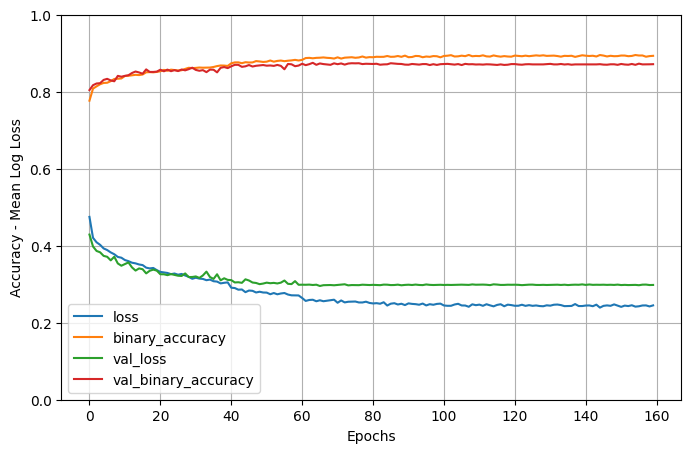

In [68]:
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

In [ ]:
model16.compile(loss=keras.losses.binary_crossentropy,
                optimizer=keras.optimizers.legacy.Adam(learning_rate=0.001),
                metrics=keras.metrics.binary_accuracy)

In [ ]:
history = model16.fit(X_train, t_train, batch_size=32, epochs=20, verbose=0, validation_data=(
    X_val, t_val))
logs = pd.DataFrame(history.history)
logs

In [62]:
from playsound import playsound
playsound('/Users/paul/Downloads/joyous-chime-notification.mp3')

In [ ]:
results = pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

## Attempt 18

In [7]:
from keras.models import Sequential

model18 = Sequential(name='model_18')

layer_sizes = [1024, 512, 256, 128, 64, 32, 16]
dropout_rates = [0.05, 0.1, 0.15, 0.15, 0.2, 0.2, 0.25]

model18.add(keras.layers.Input(shape=input_shape))

for i, layer_size in enumerate(layer_sizes):
    model18.add(keras.layers.Dense(units=layer_size,
                                   activation=keras.activations.elu,
                                   kernel_initializer=keras.initializers.HeUniform(seed=seed)))
    model18.add(keras.layers.LayerNormalization())
    model18.add(keras.layers.Dropout(dropout_rates[i]))
model18.add(keras.layers.Dense(units=output_shape, activation=keras.activations.sigmoid,
                               kernel_initializer=keras.initializers.GlorotNormal(seed=seed)))
model18.summary()

2023-11-27 23:42:02.428580: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-27 23:42:02.428601: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-27 23:42:02.428607: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-27 23:42:02.428636: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-27 23:42:02.428661: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              17408     
                                                                 
 layer_normalization (Layer  (None, 1024)              2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 layer_normalization_1 (Lay  (None, 512)               1024      
 erNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 512)               0  

In [8]:
histories = auto_fit(model18, X_train, t_train, X_val, t_val)

2023-11-27 23:42:07.933829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-27 23:42:34.140565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 1 ; learning_rate : 0.001
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.470594         0.777330  0.450475             0.793769
1   0.428129         0.800524  0.408823             0.811139
2   0.404815         0.814861  0.393396             0.822994
3   0.388328         0.824235  0.382153             0.823546
4   0.374261         0.831541  0.397549             0.824924
5   0.364487         0.837641  0.361536             0.835125
6   0.353472         0.845085  0.370118             0.828784
7   0.346204         0.847946  0.352912             0.834574
8   0.336613         0.852392  0.333415             0.846430
9   0.330649         0.854287  0.348808             0.842570
10  0.322901         0.857492  0.350996             0.839537
11  0.329039         0.854977  0.337407             0.842294
12  0.314448         0.862007  0.328107             0.843672
13  0.331237         0.851668  0.353104             0.835125
14  0.313746         0.862283  0.335978       

2023-11-28 00:08:00.648797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-28 00:08:26.958816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 4 ; learning_rate : 0.0005
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.192972         0.914668  0.328134             0.872622
1   0.187738         0.916012  0.336063             0.874276
2   0.183695         0.918390  0.338998             0.867935
3   0.180321         0.920768  0.335312             0.871519
4   0.178871         0.919941  0.345098             0.870692
5   0.178041         0.919631  0.348628             0.870692
6   0.175684         0.923559  0.342175             0.869865
7   0.173975         0.923628  0.343188             0.864351
8   0.171133         0.924421  0.384107             0.859388
9   0.171173         0.924249  0.352282             0.872071
10  0.167474         0.925558  0.357083             0.872071
11  0.171077         0.923973  0.333420             0.874552
12  0.167407         0.925627  0.353630             0.871519
13  0.163143         0.927661  0.363806             0.874001
14  0.162040         0.927316  0.363662      

2023-11-28 00:16:44.053321: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-28 00:17:10.863135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 5 ; learning_rate : 0.0001
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.141463         0.937965  0.391412             0.875655
1   0.135613         0.939895  0.404950             0.875379
2   0.132499         0.940412  0.409757             0.874001
3   0.130732         0.941860  0.421548             0.873173
4   0.132834         0.941067  0.421716             0.874552
5   0.130419         0.940929  0.426015             0.874001
6   0.130790         0.942204  0.420990             0.871795
7   0.128831         0.942342  0.430764             0.873173
8   0.128354         0.942135  0.438614             0.871243
9   0.129000         0.942135  0.443899             0.875379
10  0.129296         0.942963  0.443519             0.872622
11  0.127299         0.943445  0.443532             0.872346
12  0.125209         0.943962  0.446109             0.874001
13  0.125188         0.943479  0.447752             0.871795
14  0.126549         0.943169  0.447408      

2023-11-28 00:25:29.942157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-28 00:25:56.294563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 6 ; learning_rate : 5e-05
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.118930         0.946581  0.469556             0.873173
1   0.118621         0.947167  0.467834             0.872898
2   0.116350         0.947719  0.470378             0.875655
3   0.117892         0.947064  0.465498             0.876206
4   0.118641         0.946754  0.468583             0.872898
5   0.115281         0.947960  0.471120             0.872622
6   0.116768         0.947719  0.475155             0.873449
7   0.115714         0.948132  0.488818             0.873173
8   0.116226         0.948718  0.479520             0.874828
9   0.114966         0.949373  0.478093             0.872622
10  0.115163         0.948752  0.483144             0.875379
11  0.115944         0.947650  0.483104             0.872898
12  0.113740         0.949269  0.491412             0.873449
13  0.115364         0.948546  0.488425             0.873449
14  0.115901         0.948580  0.482209       

2023-11-28 00:34:14.733262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-28 00:34:41.449031: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 7 ; learning_rate : 1e-05
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.112179         0.949993  0.501947             0.874276
1   0.111445         0.950579  0.502356             0.874828
2   0.111483         0.951027  0.503900             0.874552
3   0.109510         0.951785  0.504230             0.874001
4   0.111129         0.948752  0.502986             0.873449
5   0.110821         0.950579  0.502530             0.873725
6   0.109340         0.951234  0.505090             0.873725
7   0.110734         0.950717  0.505717             0.872898
8   0.110409         0.950648  0.504502             0.872622
9   0.109691         0.950924  0.507467             0.873725
10  0.110866         0.950510  0.504019             0.873449
11  0.110294         0.951475  0.502255             0.875379
12  0.109401         0.951613  0.507359             0.874276
13  0.109407         0.951165  0.506686             0.873725
14  0.109446         0.952026  0.503823       

2023-11-28 00:43:26.853782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-28 00:43:58.565856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 8 ; learning_rate : 5e-06
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.110176         0.949821  0.509356             0.875379
1   0.109762         0.951268  0.507869             0.875103
2   0.108076         0.951682  0.507800             0.875103
3   0.108860         0.950751  0.509365             0.875103
4   0.108791         0.951441  0.509637             0.875103
5   0.108655         0.951406  0.510302             0.875103
6   0.109616         0.952233  0.509304             0.875655
7   0.111147         0.950441  0.508234             0.875931
8   0.108735         0.951061  0.508838             0.874552
9   0.109840         0.951613  0.508966             0.874828
10  0.109600         0.950510  0.507712             0.875103
11  0.108688         0.952371  0.508733             0.875379
12  0.108222         0.950476  0.509110             0.875103
13  0.107321         0.950958  0.509476             0.874552
14  0.108893         0.950062  0.510188       

2023-11-28 00:52:10.239093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-28 00:52:36.869552: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 9 ; learning_rate : 1.0000000000000002e-06
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.108727         0.951199  0.512106             0.874276
1   0.106319         0.952785  0.512205             0.874276
2   0.106968         0.952440  0.512387             0.874276
3   0.106722         0.953784  0.512595             0.874276
4   0.108384         0.952371  0.512706             0.874552
5   0.108909         0.951544  0.512743             0.874552
6   0.107089         0.951992  0.512611             0.874552
7   0.108339         0.951820  0.513053             0.874552
8   0.108129         0.952716  0.513109             0.874552
9   0.108632         0.950993  0.513349             0.874828
10  0.109062         0.951820  0.513086             0.874828
11  0.108797         0.951130  0.512786             0.874828
12  0.108275         0.952164  0.512832             0.874828
13  0.108031         0.952716  0.512879             0.875103
14  0.109261         0.951647

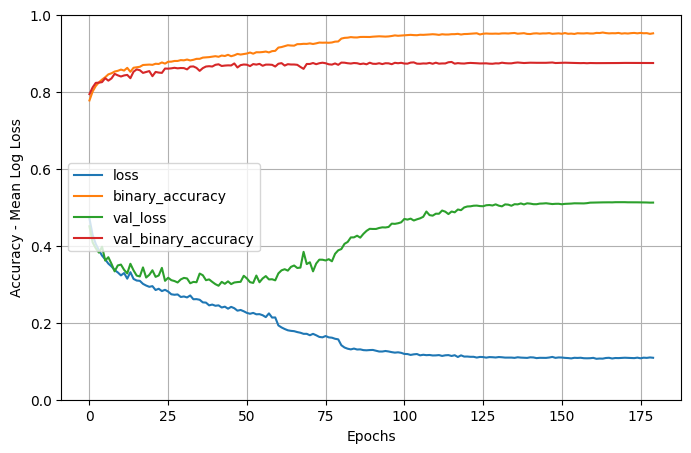

In [9]:
plot_histories(histories)

In [10]:
from playsound import playsound
playsound('/Users/paul/Downloads/joyous-chime-notification.mp3')

## Attempt 19

In [11]:
from keras.models import Sequential

model18 = Sequential(name='model_18')

layer_sizes = [1024, 512, 256, 128, 64, 32, 16]
dropout_rates = [0.05, 0.1, 0.15, 0.2, 0.2, 0.25, 0.25]

model18.add(keras.layers.Input(shape=input_shape))

for i, layer_size in enumerate(layer_sizes):
    model18.add(keras.layers.Dense(units=layer_size,
                                   activation=keras.activations.elu,
                                   kernel_initializer=keras.initializers.HeUniform(seed=seed)))
    model18.add(keras.layers.LayerNormalization())
    model18.add(keras.layers.Dropout(dropout_rates[i]))
model18.add(keras.layers.Dense(units=output_shape, activation=keras.activations.sigmoid,
                               kernel_initializer=keras.initializers.GlorotNormal(seed=seed)))
model18.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1024)              17408     
                                                                 
 layer_normalization_7 (Lay  (None, 1024)              2048      
 erNormalization)                                                
                                                                 
 dropout_7 (Dropout)         (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 layer_normalization_8 (Lay  (None, 512)               1024      
 erNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 512)               0  

In [12]:
histories = auto_fit(model18, X_train, t_train, X_val, t_val)

2023-11-28 10:48:53.881357: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-28 10:49:20.484251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 1 ; learning_rate : 0.001
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.475191         0.774779  0.443690             0.786876
1   0.424531         0.803109  0.409678             0.816101
2   0.401197         0.817756  0.402252             0.816377
3   0.387482         0.825165  0.387521             0.815550
4   0.377577         0.829990  0.383122             0.829336
5   0.365600         0.836263  0.372740             0.828233
6   0.355794         0.840743  0.367803             0.827130
7   0.348431         0.846567  0.355797             0.845327
8   0.348937         0.845189  0.348469             0.840088
9   0.338871         0.851254  0.342576             0.843121
10  0.327602         0.856975  0.340761             0.840088
11  0.327042         0.855114  0.338634             0.843121
12  0.323111         0.856252  0.355309             0.845051
13  0.316932         0.859457  0.360821             0.830438
14  0.337263         0.852185  0.366610       

2023-11-28 11:23:33.667258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-28 11:24:02.088918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 5 ; learning_rate : 0.0005
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.169219         0.924972  0.362105             0.869589
1   0.163505         0.928798  0.373146             0.866281
2   0.159191         0.930624  0.377029             0.864902
3   0.157884         0.931004  0.369503             0.872346
4   0.156868         0.931900  0.391391             0.869038
5   0.156127         0.929591  0.378416             0.870968
6   0.153958         0.933657  0.374803             0.867108
7   0.153258         0.933451  0.371923             0.871243
8   0.148934         0.933967  0.396601             0.868762
9   0.150859         0.933864  0.407334             0.870692
10  0.147768         0.935312  0.408299             0.866832
11  0.147403         0.935105  0.403297             0.867935
12  0.145716         0.935070  0.416414             0.869313
13  0.151664         0.933657  0.368692             0.869865
14  0.144164         0.935725  0.402720      

2023-11-28 11:32:29.364724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-28 11:32:57.051724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 6 ; learning_rate : 0.0001
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.125478         0.943652  0.437898             0.876206
1   0.120816         0.946271  0.444907             0.872898
2   0.116490         0.948925  0.464414             0.868211
3   0.117090         0.948925  0.466649             0.873173
4   0.115680         0.948856  0.469362             0.869038
5   0.115115         0.950131  0.485112             0.873725
6   0.114530         0.948580  0.485901             0.872898
7   0.113333         0.950579  0.484977             0.873173
8   0.111950         0.950372  0.485023             0.871519
9   0.111006         0.950510  0.498854             0.870968
10  0.108908         0.952268  0.498185             0.871519
11  0.110688         0.952061  0.501894             0.874552
12  0.111113         0.952268  0.494416             0.873725
13  0.111100         0.951785  0.499006             0.873725
14  0.110385         0.951234  0.501937      

2023-11-28 11:41:15.050193: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


KeyboardInterrupt: 

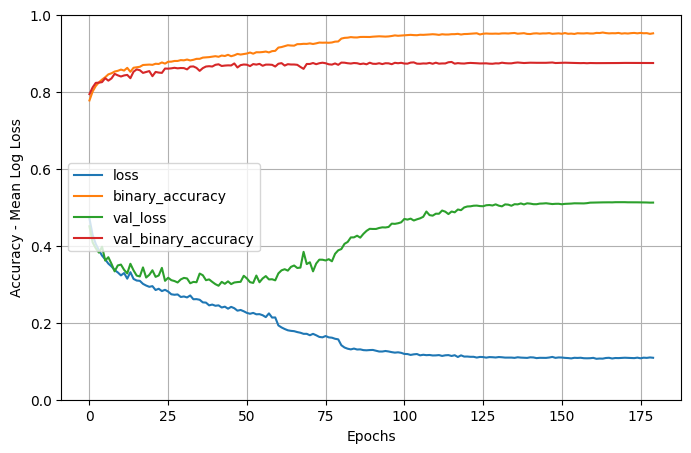

In [13]:
plot_histories(histories)

## Attempt 20

**Ideas :**
* **Increase Dropout**
* **Add Regularization**

In [7]:
from model_trainer import ModelTrainer

In [8]:
mt = ModelTrainer()

In [9]:
from keras.models import Sequential

model20 = Sequential(name='model_20')

layer_sizes = [1024, 512, 256, 128, 64, 32, 16]
dropout_rates = [0.05, 0.1, 0.15, 0.2, 0.25, 0.25, 0.3]

model20.add(keras.layers.Input(shape=input_shape))

for i, layer_size in enumerate(layer_sizes):
    model20.add(keras.layers.Dense(units=layer_size,
                                   activation=keras.activations.elu,
                                   kernel_initializer=keras.initializers.HeUniform(seed=seed)))
    model20.add(keras.layers.LayerNormalization())
    model20.add(keras.layers.Dropout(dropout_rates[i]))
model20.add(keras.layers.Dense(units=output_shape, activation=keras.activations.sigmoid,
                               kernel_initializer=keras.initializers.GlorotNormal(seed=seed)))
model20.summary()

2023-11-28 20:19:57.380919: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-28 20:19:57.380957: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-28 20:19:57.380967: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-28 20:19:57.381570: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-28 20:19:57.382043: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              17408     
                                                                 
 layer_normalization (Layer  (None, 1024)              2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 layer_normalization_1 (Lay  (None, 512)               1024      
 erNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 512)               0  

In [10]:
mt.auto_fit(model20, X_train, t_train, X_val, t_val)

2023-11-28 20:20:02.917900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-28 20:20:28.832406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 1 ; learning_rate : 0.001
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.476806         0.772918  0.439144             0.788255
1   0.428579         0.801179  0.418073             0.811966
2   0.403553         0.817687  0.396448             0.818031
3   0.387272         0.826268  0.379944             0.826027
4   0.376795         0.831369  0.374271             0.827681
5   0.368490         0.837779  0.372600             0.833471
6   0.359647         0.841260  0.363787             0.833196
7   0.347092         0.847670  0.357931             0.836780
8   0.341609         0.850427  0.360539             0.831541
9   0.336395         0.854563  0.354502             0.837607
10  0.330664         0.854149  0.359417             0.834023
11  0.327920         0.855942  0.340914             0.837055
12  0.319683         0.859009  0.337699             0.848635
13  0.312495         0.861766  0.344053             0.844224
14  0.318311         0.859216  0.339378       

2023-11-28 20:37:13.823422: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-28 20:37:40.007618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 3 ; learning_rate : 0.0005
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.228679         0.897436  0.316638             0.867659
1   0.224944         0.900124  0.321323             0.860491
2   0.225019         0.899848  0.316575             0.860215
3   0.221813         0.901089  0.306592             0.868211
4   0.215959         0.902640  0.309112             0.864902
5   0.217616         0.901227  0.312448             0.866832
6   0.211930         0.907017  0.321313             0.870692
7   0.211674         0.905604  0.324541             0.866832
8   0.209092         0.906603  0.307656             0.867108
9   0.208216         0.906396  0.341208             0.860491
10  0.207259         0.907534  0.313496             0.866556
11  0.207648         0.906810  0.324092             0.862972
12  0.203073         0.909085  0.319743             0.859388
13  0.205078         0.908602  0.320054             0.866005
14  0.199444         0.911738  0.323160      

2023-11-28 21:30:34.184804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-28 21:31:00.913892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 4 ; learning_rate : 0.0001
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.176891         0.922526  0.341790             0.869589
1   0.170236         0.924076  0.349837             0.870141
2   0.169375         0.923111  0.351356             0.870692
3   0.167176         0.925283  0.359617             0.866832
4   0.164700         0.925283  0.364299             0.866556
5   0.164467         0.926696  0.361681             0.870141
6   0.162960         0.926385  0.364950             0.871795
7   0.163074         0.926213  0.369772             0.871795
8   0.160302         0.927488  0.366490             0.870692
9   0.162727         0.927419  0.364305             0.870141
10  0.159209         0.928626  0.363649             0.871795
11  0.159922         0.929143  0.366240             0.868762
12  0.159343         0.929005  0.371899             0.866832
13  0.158471         0.928246  0.369171             0.870968
14  0.158612         0.928798  0.374434      

2023-11-28 21:39:13.177093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-28 21:39:39.312916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 5 ; learning_rate : 5e-05
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.150416         0.932003  0.386904             0.870968
1   0.149431         0.933244  0.392231             0.870416
2   0.149031         0.931934  0.387417             0.871519
3   0.149821         0.932244  0.388468             0.871243
4   0.149778         0.932072  0.386886             0.872622
5   0.148022         0.932968  0.387831             0.870416
6   0.148350         0.933933  0.395938             0.871795
7   0.149533         0.932727  0.393792             0.870416
8   0.147939         0.934002  0.387628             0.872898
9   0.147016         0.933278  0.391498             0.872346
10  0.147945         0.933933  0.389140             0.871795
11  0.144231         0.935656  0.401780             0.866281
12  0.146556         0.933588  0.396339             0.871243
13  0.144375         0.935001  0.398404             0.872346
14  0.145941         0.935656  0.395410       

2023-11-28 21:47:51.039496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-28 21:48:17.189221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


KeyboardInterrupt: 

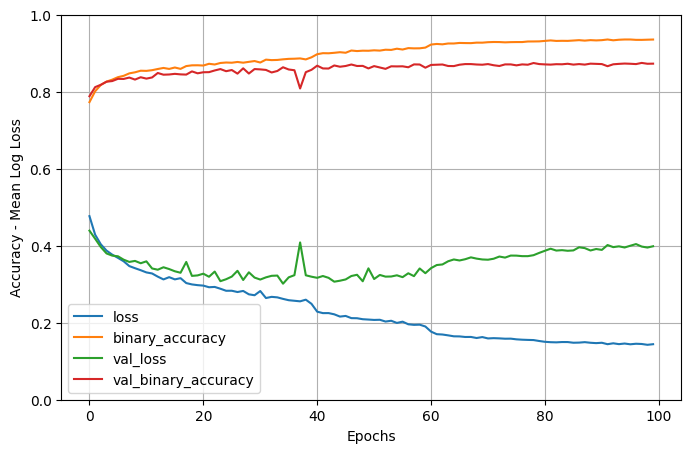

In [11]:
mt.plot_histories()

## Attempt 21

In [7]:
from model_trainer import ModelTrainer
mt = ModelTrainer()

In [8]:
from keras.models import Sequential

model21 = Sequential(name='model_21')

layer_sizes = [1024, 512, 256, 128, 64, 32, 16]
dropout_rates = [0.05, 0.1, 0.15, 0.2, 0.25, 0.25, 0.3]

model21.add(keras.layers.Input(shape=input_shape))

for i, layer_size in enumerate(layer_sizes):
    model21.add(keras.layers.Dense(units=layer_size,
                                   activation=keras.activations.elu,
                                   kernel_initializer=keras.initializers.HeUniform(seed=seed),
                                   kernel_regularizer=keras.regularizers.l2(0.0005)))
    model21.add(keras.layers.LayerNormalization())
    model21.add(keras.layers.Dropout(dropout_rates[i]))
model21.add(keras.layers.Dense(units=output_shape, activation=keras.activations.sigmoid,
                               kernel_initializer=keras.initializers.GlorotNormal(seed=seed)))
model21.summary()

2023-11-28 21:52:12.191934: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-28 21:52:12.191967: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-28 21:52:12.191976: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-28 21:52:12.192290: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-28 21:52:12.192320: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              17408     
                                                                 
 layer_normalization (Layer  (None, 1024)              2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 layer_normalization_1 (Lay  (None, 512)               1024      
 erNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 512)               0  

In [9]:
mt.auto_fit(model21, X_train, t_train, X_val, t_val)

2023-11-28 21:52:16.850385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-28 21:52:59.692289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 1 ; learning_rate : 0.001
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   1.317857         0.768128  0.739544             0.787703
1   0.639733         0.789702  0.564408             0.788255
2   0.538510         0.794389  0.517334             0.794872
3   0.504199         0.798215  0.493440             0.808382
4   0.486621         0.802730  0.483538             0.798456
5   0.501888         0.798353  0.542762             0.781638
6   0.494055         0.803970  0.486885             0.805349
7   0.482105         0.807520  0.486954             0.801765
8   0.473952         0.805969  0.463585             0.812793
9   0.459726         0.811242  0.460449             0.807830
10  0.451127         0.813138  0.446470             0.813069
11  0.447414         0.816618  0.450991             0.820513
12  0.442100         0.819789  0.437206             0.818859
13  0.433455         0.818135  0.424050             0.816653
14  0.426487         0.825165  0.422330       

2023-11-28 22:38:52.901101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-28 22:39:41.573591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 4 ; learning_rate : 0.0005
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.356703         0.854012  0.361606             0.845327
1   0.353923         0.856631  0.364682             0.846154
2   0.352324         0.858009  0.365392             0.847808
3   0.351680         0.858837  0.360212             0.844775
4   0.347896         0.858733  0.356061             0.846705
5   0.347840         0.859767  0.361423             0.850014
6   0.346732         0.857389  0.363256             0.842845
7   0.345107         0.860939  0.356927             0.851668
8   0.348333         0.858837  0.357081             0.847808
9   0.346656         0.858802  0.356369             0.845327
10  0.347205         0.860077  0.357290             0.849738
11  0.344630         0.859181  0.354086             0.850014
12  0.344851         0.859009  0.356026             0.848911
13  0.343415         0.859733  0.352554             0.851117
14  0.342858         0.860181  0.354897      

2023-11-28 22:56:28.228181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-28 22:57:19.623236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 5 ; learning_rate : 0.0001
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.331216         0.864730  0.343924             0.852219
1   0.326956         0.866901  0.342797             0.854149
2   0.325909         0.867625  0.343346             0.856631
3   0.325323         0.867487  0.341720             0.854425
4   0.326119         0.867211  0.343850             0.850841
5   0.324691         0.867073  0.341552             0.854701
6   0.324060         0.869899  0.342968             0.854425
7   0.323756         0.867590  0.340556             0.854701
8   0.322670         0.869693  0.340400             0.854701
9   0.323733         0.868728  0.343271             0.852219
10  0.324073         0.868073  0.341739             0.854149
11  0.323112         0.867728  0.338762             0.858009
12  0.324162         0.868176  0.340009             0.855804
13  0.320655         0.868900  0.342628             0.855252
14  0.323152         0.866625  0.340421      

2023-11-29 11:22:17.316302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 11:23:22.007505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 6 ; learning_rate : 5e-05
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.318382         0.869934  0.338724             0.855528
1   0.318821         0.869279  0.336691             0.854149
2   0.320093         0.869210  0.337676             0.852495
3   0.318497         0.868555  0.337335             0.854701
4   0.318707         0.868831  0.337173             0.854149
5   0.320349         0.868521  0.338966             0.854977
6   0.319547         0.869038  0.337463             0.853874
7   0.317872         0.870451  0.337509             0.855528
8   0.318042         0.870623  0.337019             0.855252
9   0.318948         0.868073  0.337403             0.852771
10  0.318218         0.868417  0.336973             0.853874
11  0.318328         0.869279  0.336577             0.854701
12  0.317471         0.869693  0.337464             0.854425
13  0.318321         0.869245  0.336376             0.856079
14  0.315466         0.869624  0.335353       

2023-11-29 11:53:00.001772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 11:54:06.303014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 7 ; learning_rate : 1e-05
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.315617         0.870658  0.335959             0.854149
1   0.316433         0.871106  0.335727             0.853874
2   0.316304         0.871278  0.335803             0.854425
3   0.314524         0.870451  0.335875             0.853322
4   0.316420         0.870899  0.335608             0.855528
5   0.314727         0.870968  0.335668             0.854701
6   0.316401         0.870313  0.335678             0.853874
7   0.314852         0.870864  0.335605             0.854149
8   0.318106         0.870899  0.335503             0.854701
9   0.317012         0.869624  0.335422             0.853874
10  0.314470         0.871175  0.335330             0.854425
11  0.316527         0.870520  0.335431             0.855804
12  0.315441         0.872346  0.335368             0.854977
13  0.314063         0.872071  0.335316             0.855528
14  0.315253         0.871381  0.335689       

2023-11-29 12:20:41.627723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 12:21:42.118724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


KeyboardInterrupt: 

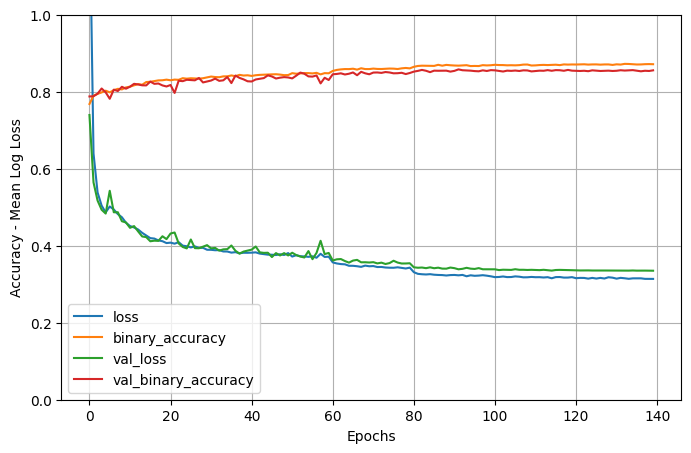

In [10]:
mt.plot_histories()

## Attempt 22

In [7]:
from model_trainer import ModelTrainer
mt = ModelTrainer()

In [8]:
from keras.models import Sequential

model22 = Sequential(name='model22')

layer_sizes = [1024, 512, 256, 128, 64, 32, 16]
dropout_rates = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]

model22.add(keras.layers.Input(shape=input_shape))

for i, layer_size in enumerate(layer_sizes):
    model22.add(keras.layers.Dense(units=layer_size,
                                   activation=keras.activations.elu,
                                   kernel_initializer=keras.initializers.HeUniform(
                                       seed=seed)))
    model22.add(keras.layers.LayerNormalization())
    model22.add(keras.layers.Dropout(dropout_rates[i]))
model22.add(keras.layers.Dense(units=output_shape, activation=keras.activations.sigmoid,
                               kernel_initializer=keras.initializers.GlorotNormal(seed=seed)))
model22.summary()

2023-11-29 12:40:59.282308: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-29 12:40:59.282339: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-29 12:40:59.282345: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-29 12:40:59.282624: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-29 12:40:59.282650: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              17408     
                                                                 
 layer_normalization (Layer  (None, 1024)              2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 layer_normalization_1 (Lay  (None, 512)               1024      
 erNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 512)               0   

2023-11-29 12:41:04.385351: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 12:41:30.089819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 1 ; learning_rate : 0.001
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.477109         0.770782  0.441658             0.789082
1   0.426201         0.800248  0.411626             0.806727
2   0.401702         0.816618  0.401265             0.805073
3   0.386438         0.826268  0.379626             0.827957
4   0.372783         0.833954  0.378076             0.826854
5   0.369636         0.834023  0.354526             0.836780
6   0.353514         0.843224  0.367715             0.832093
7   0.349840         0.847670  0.346505             0.840915
8   0.341312         0.849256  0.350971             0.835677
9   0.333376         0.855011  0.352266             0.837883
10  0.327705         0.857389  0.335815             0.841467
11  0.324057         0.858664  0.340783             0.845878
12  0.334754         0.853701  0.346350             0.840915
13  0.319105         0.859629  0.352078             0.844224
14  0.310222         0.863937  0.324608       

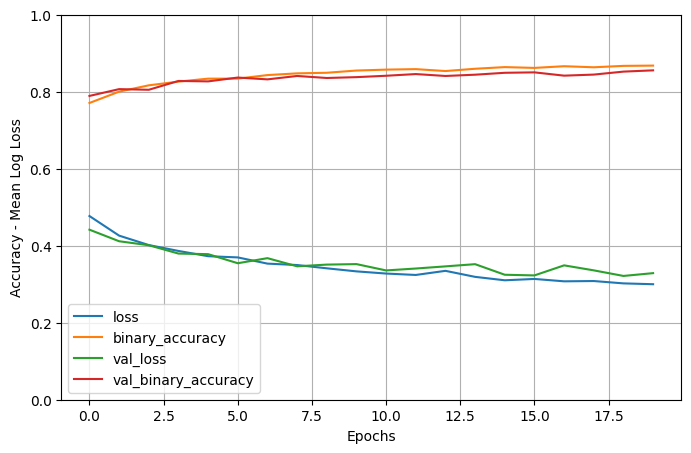

Epoch_step : 2 ; learning_rate : 0.001
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.298510         0.868073  0.321902             0.851944
1   0.292930         0.871243  0.333985             0.851117
2   0.294262         0.870347  0.315832             0.857458
3   0.288478         0.873070  0.320363             0.853322
4   0.286517         0.872898  0.319877             0.855804
5   0.289249         0.872794  0.323243             0.850014
6   0.284968         0.874173  0.325611             0.847257
7   0.290198         0.871623  0.317604             0.855804
8   0.275969         0.877964  0.314370             0.857734
9   0.272415         0.880893  0.308640             0.861042
10  0.272291         0.878550  0.314850             0.857458
11  0.275310         0.878481  0.303527             0.862696
12  0.266514         0.883547  0.307437             0.862696
13  0.263204         0.884581  0.315722             0.859388
14  0.269266         0.880135  0.310750       

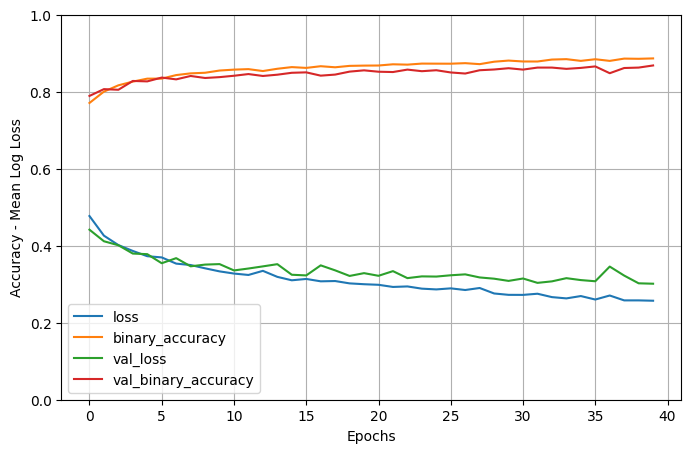

Epoch_step : 3 ; learning_rate : 0.001
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.254957         0.887510  0.308209             0.861869
1   0.250058         0.888785  0.310028             0.868211
2   0.250214         0.890681  0.306384             0.859939
3   0.241589         0.893231  0.315866             0.864902
4   0.252852         0.889544  0.307188             0.862696
5   0.246193         0.891267  0.325938             0.855528
6   0.242477         0.892094  0.300910             0.868762
7   0.237354         0.895403  0.307406             0.869038
8   0.236310         0.895644  0.304436             0.859664
9   0.241541         0.893886  0.318321             0.868486
10  0.237522         0.894196  0.312441             0.864902
11  0.229128         0.898849  0.316458             0.859388
12  0.229226         0.898160  0.307717             0.863524
13  0.228536         0.897884  0.322744             0.854701
14  0.231627         0.896643  0.351941       

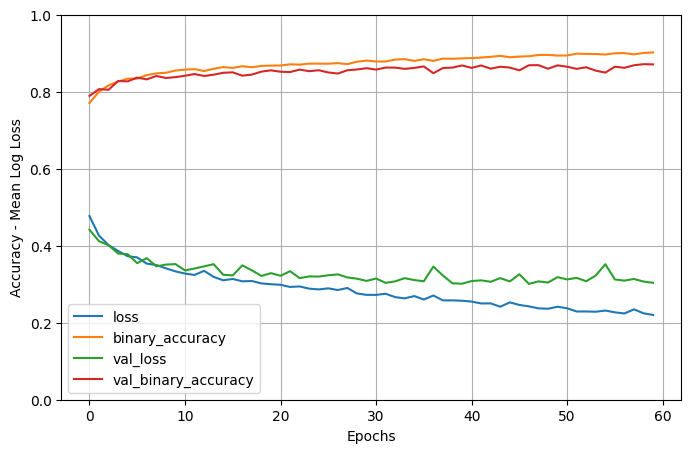

2023-11-29 13:06:21.255127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 13:06:46.922243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 4 ; learning_rate : 0.0005
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.197636         0.911566  0.319644             0.866556
1   0.192428         0.915012  0.346489             0.869038
2   0.190930         0.914392  0.344393             0.871243
3   0.188500         0.914978  0.328296             0.872622
4   0.183676         0.918390  0.337507             0.868211
5   0.182742         0.919045  0.350735             0.872071
6   0.183343         0.918769  0.359170             0.870416
7   0.181489         0.918666  0.328401             0.867659
8   0.179128         0.920940  0.335034             0.869038
9   0.179667         0.921009  0.342782             0.873725
10  0.176416         0.922215  0.347375             0.874001
11  0.173585         0.923663  0.332424             0.872622
12  0.174765         0.922905  0.348809             0.866005
13  0.169845         0.924249  0.348143             0.868762
14  0.173001         0.923594  0.352348      

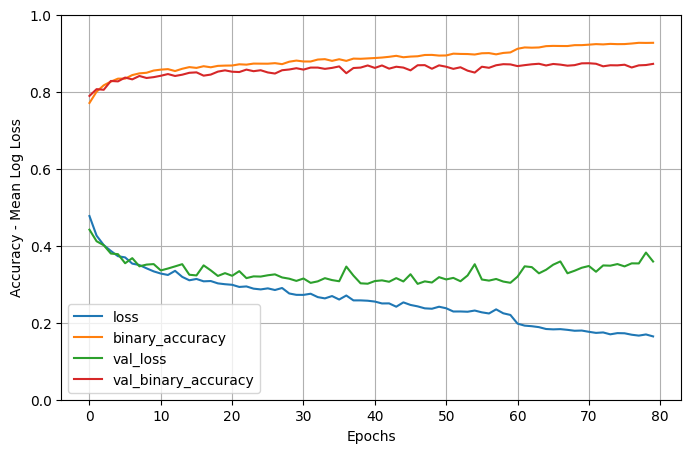

2023-11-29 13:15:06.836559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 13:15:33.580950: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 5 ; learning_rate : 0.0001
        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.146669         0.934588  0.382861             0.873173
1   0.143306         0.936794  0.387903             0.875103
2   0.142647         0.936759  0.391474             0.875379
3   0.139004         0.938448  0.395788             0.874276
4   0.137070         0.939344  0.410277             0.873173
5   0.137952         0.938448  0.416643             0.875655
6   0.138154         0.937862  0.412111             0.873173
7   0.135756         0.938138  0.413904             0.873725
8   0.134076         0.939861  0.415949             0.876482
9   0.133468         0.940895  0.429409             0.874552
10  0.135046         0.939413  0.408562             0.870692
11  0.132397         0.941136  0.421550             0.875103
12  0.132117         0.941722  0.437192             0.874276
13  0.130703         0.942342  0.435063             0.874552
14  0.132713         0.942032  0.422913      

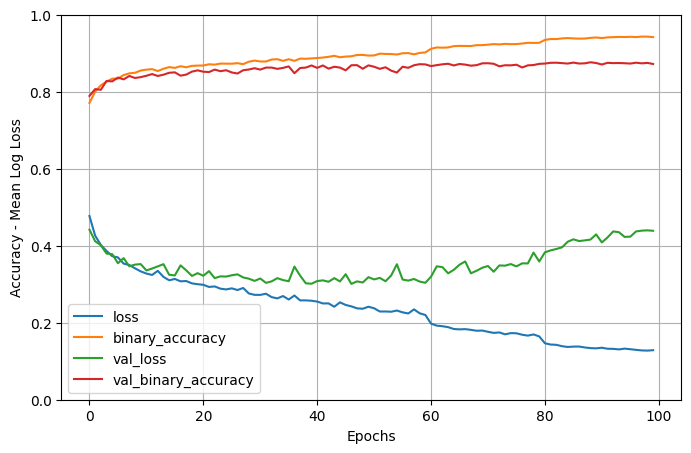

2023-11-29 13:24:07.420668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


KeyboardInterrupt: 

In [9]:
mt.auto_fit(model22, X_train, t_train, X_val, t_val, auto_plot=True)

## Attempt 23

In [7]:
from model_trainer import ModelTrainer
mt = ModelTrainer()

In [8]:
from keras.models import Sequential

model23 = Sequential(name='model23')

layer_sizes = [1024, 512, 256, 128, 64, 32, 16]
dropout_rates = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]

model23.add(keras.layers.Input(shape=input_shape))

for i, layer_size in enumerate(layer_sizes):
    model23.add(keras.layers.Dense(units=layer_size,
                                   activation=keras.activations.elu,
                                   kernel_initializer=keras.initializers.HeUniform(
                                       seed=seed)))
    model23.add(keras.layers.LayerNormalization())
    model23.add(keras.layers.Dropout(dropout_rates[i]))
model23.add(keras.layers.Dense(units=output_shape, activation=keras.activations.sigmoid,
                               kernel_initializer=keras.initializers.GlorotNormal(seed=seed)))
model23.summary()

2023-11-29 13:27:04.643110: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-29 13:27:04.643140: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-29 13:27:04.643157: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-29 13:27:04.643204: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-29 13:27:04.643223: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              17408     
                                                                 
 layer_normalization (Layer  (None, 1024)              2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 layer_normalization_1 (Lay  (None, 512)               1024      
 erNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 512)               0   

Epoch_step : 1 ; learning_rate : 0.001
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.483085         0.768369  0.446187             0.777778
1  0.432149         0.795699  0.428142             0.806452
2  0.407246         0.814275  0.401536             0.814171
3  0.394450         0.818411  0.396065             0.817756
4  0.380117         0.828646  0.378210             0.827957
5  0.368895         0.833919  0.367740             0.831541
6  0.359832         0.841639  0.364065             0.835401
7  0.356934         0.842259  0.355826             0.842570
8  0.344530         0.848325  0.347764             0.841191
9  0.340120         0.850290  0.358250             0.830438


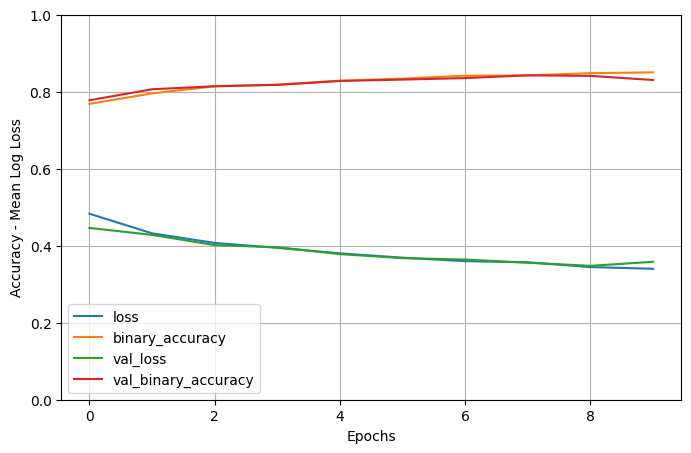

Epoch_step : 2 ; learning_rate : 0.001
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.335102         0.852013  0.345732             0.841191
1  0.329509         0.854666  0.336497             0.842845
2  0.324518         0.856734  0.340517             0.842018
3  0.321935         0.857699  0.328939             0.848635
4  0.320368         0.857113  0.347859             0.840640
5  0.320703         0.859043  0.333078             0.849738
6  0.316038         0.859733  0.324271             0.849187
7  0.312171         0.862903  0.327334             0.846154
8  0.305128         0.864695  0.320702             0.848360
9  0.315737         0.859181  0.329495             0.845602


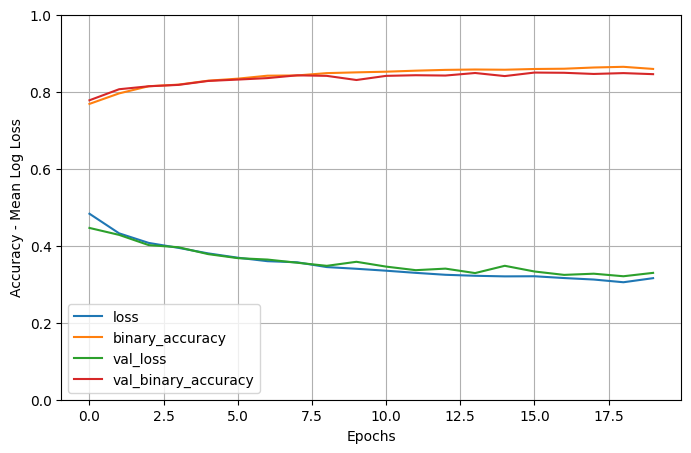

2023-11-29 13:35:48.410458: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 13:36:14.005178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 3 ; learning_rate : 0.0005
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.291111         0.872277  0.313755             0.859388
1  0.281946         0.874586  0.309783             0.859112
2  0.284143         0.873105  0.310881             0.856355
3  0.278798         0.877481  0.306423             0.858009
4  0.274677         0.877171  0.310289             0.861318
5  0.280339         0.875931  0.312803             0.858009
6  0.271075         0.879618  0.313527             0.859664
7  0.268239         0.880101  0.303072             0.858837
8  0.270108         0.880549  0.305305             0.862421
9  0.266305         0.880928  0.314342             0.854977


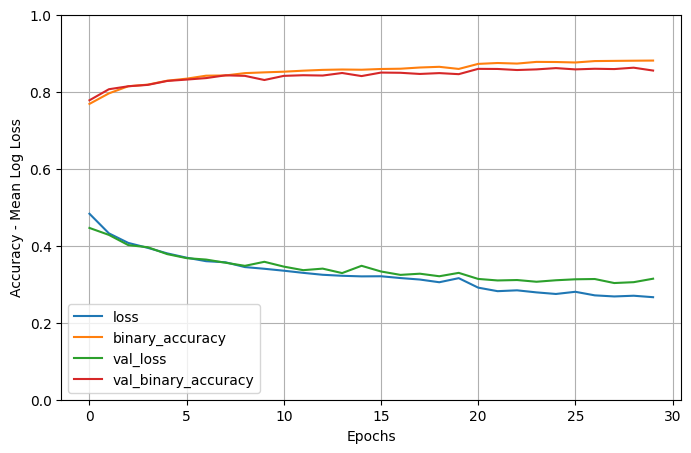

2023-11-29 13:40:07.868838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 13:40:33.681376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 4 ; learning_rate : 0.0001
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.251361         0.887200  0.298639             0.867108
1  0.245301         0.889819  0.300630             0.866281
2  0.243088         0.890440  0.302967             0.864075
3  0.241658         0.891026  0.301591             0.866005
4  0.239504         0.892163  0.301807             0.864351
5  0.238195         0.892508  0.303440             0.865178
6  0.236833         0.893162  0.302346             0.865178
7  0.235602         0.894610  0.308818             0.860766
8  0.235178         0.894058  0.302463             0.865729
9  0.233102         0.894644  0.302140             0.865178


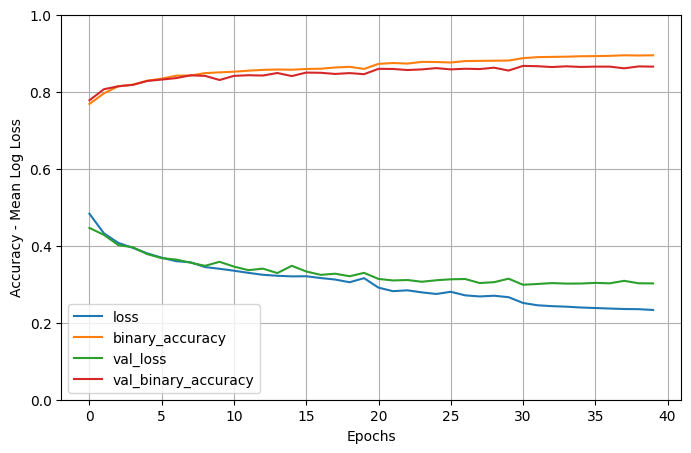

2023-11-29 13:44:25.293681: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 13:44:51.918984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 5 ; learning_rate : 5e-05
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.231245         0.895713  0.303160             0.867108
1  0.230647         0.895920  0.307043             0.863799
2  0.228883         0.896885  0.307349             0.865178
3  0.231331         0.895678  0.304696             0.864075
4  0.229881         0.897091  0.303530             0.869038
5  0.228737         0.897022  0.307325             0.867384
6  0.228645         0.896953  0.308509             0.865729
7  0.227307         0.898987  0.302646             0.867384
8  0.227890         0.897608  0.302718             0.867108
9  0.227525         0.898022  0.303871             0.867659


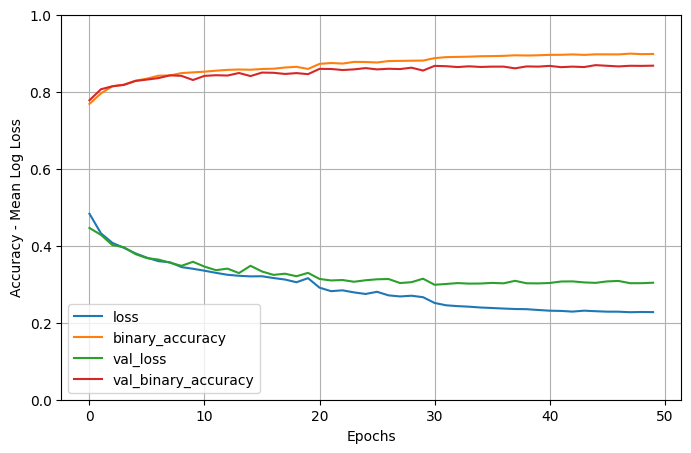

2023-11-29 13:48:52.978984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 13:49:19.602897: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 6 ; learning_rate : 1e-05
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.224024         0.897712  0.306050             0.867384
1  0.222991         0.900675  0.307082             0.867384
2  0.223298         0.899504  0.307241             0.868762
3  0.223735         0.899779  0.305712             0.869038
4  0.221896         0.899366  0.307540             0.868211
5  0.224204         0.899814  0.308447             0.868762
6  0.222811         0.900055  0.308666             0.866832
7  0.221687         0.899745  0.308152             0.866832
8  0.221684         0.899538  0.309162             0.867659
9  0.222784         0.898366  0.308165             0.869038


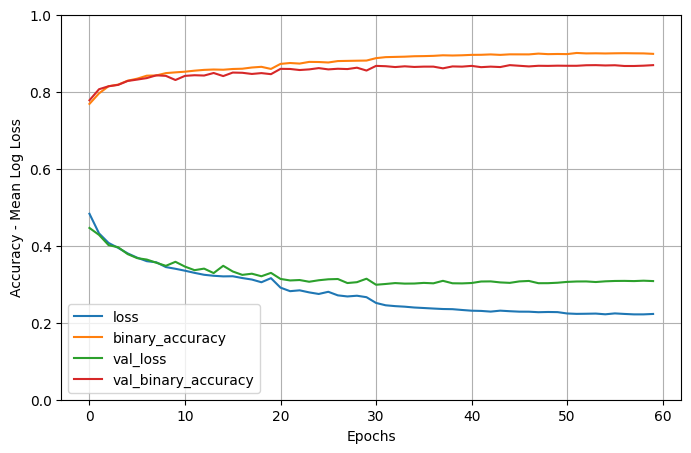

2023-11-29 13:53:20.690556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 13:53:47.281969: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 7 ; learning_rate : 5e-06
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.221380         0.899986  0.309384             0.868211
1  0.221059         0.900227  0.309291             0.868211
2  0.221104         0.900813  0.309546             0.868211
3  0.220485         0.899159  0.309558             0.867659
4  0.223254         0.899607  0.309915             0.867384
5  0.221230         0.899331  0.310312             0.866832
6  0.221149         0.899779  0.310707             0.867384
7  0.221093         0.901192  0.310308             0.867935
8  0.221099         0.900021  0.311218             0.867384
9  0.221270         0.899366  0.311045             0.867384


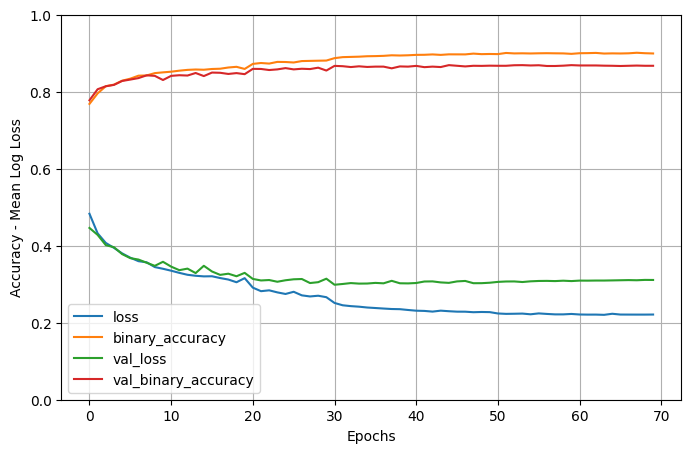

2023-11-29 13:57:47.909874: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 13:58:14.391330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 8 ; learning_rate : 1.0000000000000002e-06
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.223495         0.899538  0.310914             0.867659
1  0.219401         0.901261  0.310967             0.868211
2  0.220352         0.901261  0.310927             0.867659
3  0.220818         0.900021  0.310912             0.867935
4  0.219689         0.901813  0.310832             0.867384
5  0.221605         0.899331  0.310556             0.867659
6  0.220999         0.899814  0.310326             0.867659
7  0.220776         0.899607  0.310527             0.867659
8  0.221859         0.899090  0.310372             0.867659
9  0.222409         0.900917  0.310090             0.867935


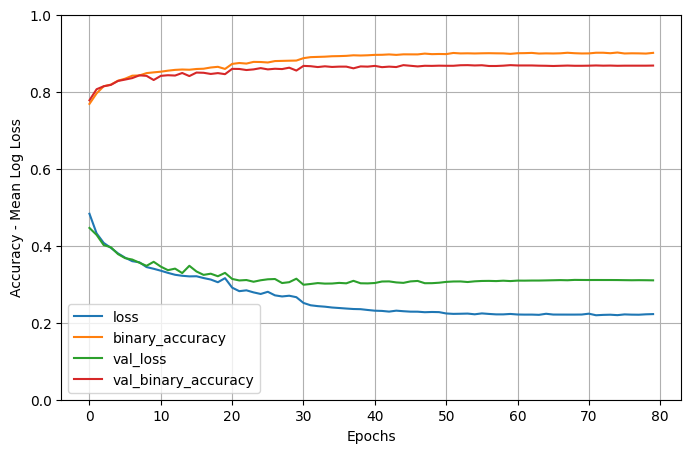

In [9]:
mt.auto_fit(model23, X_train, t_train, X_val, t_val, auto_plot=True, epochs_per_step=10, ac_increase_range=0.3)

## Attempt 24

In [7]:
from model_trainer import ModelTrainer
mt = ModelTrainer()

In [8]:
from keras.models import Sequential

model24 = Sequential(name='model24')

layer_sizes = [1024, 512, 256, 128, 64, 32, 16]
dropout_rates = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]

model24.add(keras.layers.Input(shape=input_shape))

for i, layer_size in enumerate(layer_sizes):
    model24.add(keras.layers.Dense(units=layer_size,
                                   activation=keras.activations.elu,
                                   kernel_initializer=keras.initializers.HeUniform(
                                       seed=seed)))
    model24.add(keras.layers.LayerNormalization())
    model24.add(keras.layers.BatchNormalization())
    model24.add(keras.layers.Dropout(dropout_rates[i]))
model24.add(keras.layers.Dense(units=output_shape, activation=keras.activations.sigmoid,
                               kernel_initializer=keras.initializers.GlorotNormal(seed=seed)))
model24.summary()

2023-11-29 19:50:06.688818: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-29 19:50:06.688888: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-29 19:50:06.688908: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-29 19:50:06.689473: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-29 19:50:06.689936: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              17408     
                                                                 
 layer_normalization (Layer  (None, 1024)              2048      
 Normalization)                                                  
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 layer_normalization_1 (Lay  (None, 512)               1024

2023-11-29 19:50:15.779225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 19:50:56.780255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 1 ; learning_rate : 0.001
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.504607         0.759960  0.443846             0.794596
1  0.452525         0.793597  0.425817             0.808106
2  0.436359         0.801316  0.415209             0.812793
3  0.426348         0.808761  0.404026             0.814723
4  0.417164         0.814482  0.409007             0.811139
5  0.407852         0.815722  0.390815             0.824924
6  0.400148         0.820961  0.379218             0.824373
7  0.394103         0.822719  0.377447             0.821616
8  0.388093         0.826578  0.376854             0.832093
9  0.382774         0.830473  0.366721             0.838985


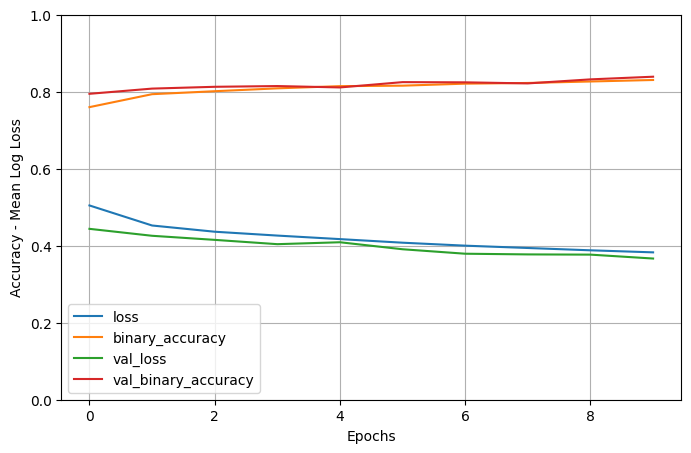

Epoch_step : 2 ; learning_rate : 0.001
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.378220         0.832506  0.373821             0.829611
1  0.375277         0.833816  0.351491             0.845878
2  0.371753         0.833781  0.360171             0.838710
3  0.366391         0.836470  0.354675             0.838985
4  0.364008         0.838193  0.347369             0.843397
5  0.360478         0.840467  0.351441             0.839537
6  0.357699         0.842156  0.342955             0.844775
7  0.355498         0.843087  0.346148             0.838710
8  0.352610         0.844844  0.336230             0.844224
9  0.347059         0.848049  0.335547             0.852495


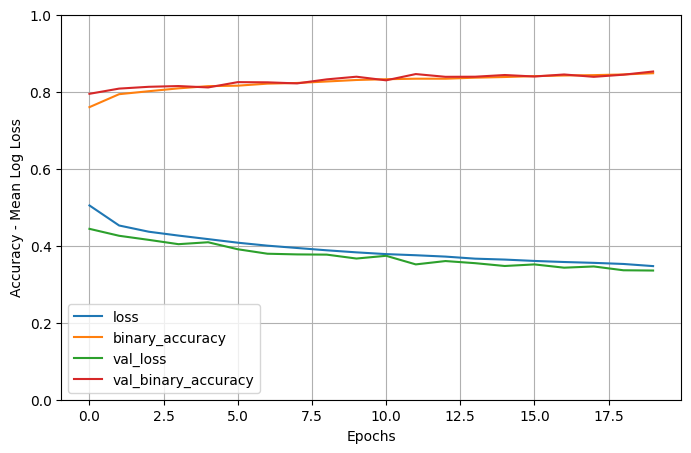

Epoch_step : 3 ; learning_rate : 0.001
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.345173         0.848808  0.328954             0.849738
1  0.341686         0.851048  0.328897             0.850014
2  0.341232         0.850806  0.329549             0.856907
3  0.339329         0.852909  0.329634             0.850290
4  0.334488         0.854977  0.322852             0.856907
5  0.337024         0.852668  0.323031             0.854977
6  0.333388         0.855562  0.329951             0.854149
7  0.329134         0.857389  0.323275             0.851668
8  0.325917         0.856114  0.326610             0.848360
9  0.327092         0.857665  0.314356             0.853598


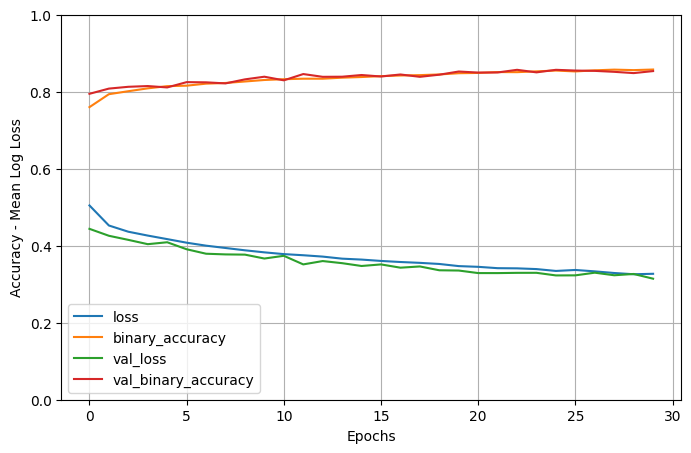

2023-11-29 20:10:30.967266: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 20:11:12.490661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 4 ; learning_rate : 0.0005
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.315757         0.863627  0.314898             0.856355
1  0.312132         0.864213  0.314253             0.852495
2  0.309074         0.866177  0.311855             0.857458
3  0.307592         0.866074  0.314399             0.855252
4  0.305024         0.868969  0.308463             0.857734
5  0.301312         0.869899  0.308610             0.862696
6  0.301864         0.867246  0.307872             0.860215
7  0.299361         0.871381  0.315111             0.855804
8  0.301875         0.869762  0.313744             0.861594
9  0.294531         0.872656  0.309816             0.863799


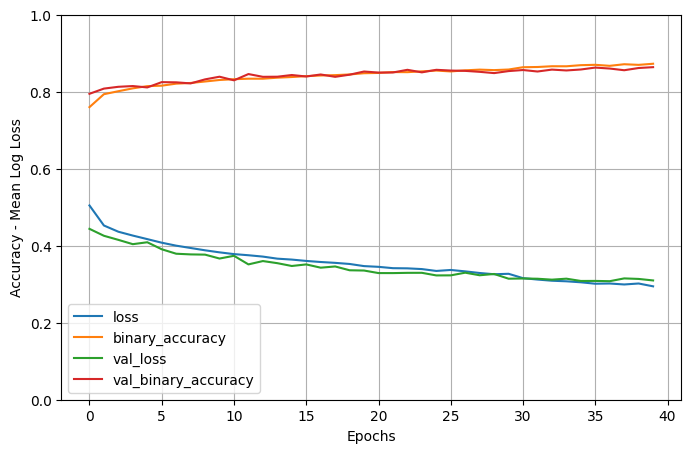

2023-11-29 20:17:12.059431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 20:17:54.020928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 5 ; learning_rate : 0.0001
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.291946         0.872898  0.303649             0.867659
1  0.286785         0.875551  0.303240             0.863248
2  0.285570         0.875965  0.301652             0.864351
3  0.286885         0.874897  0.300719             0.865729
4  0.283854         0.877481  0.298779             0.866005
5  0.285203         0.876447  0.299442             0.861042
6  0.282023         0.878136  0.301267             0.866832
7  0.282322         0.877860  0.299276             0.865178
8  0.282032         0.878033  0.299308             0.865729
9  0.280087         0.878067  0.295969             0.868762


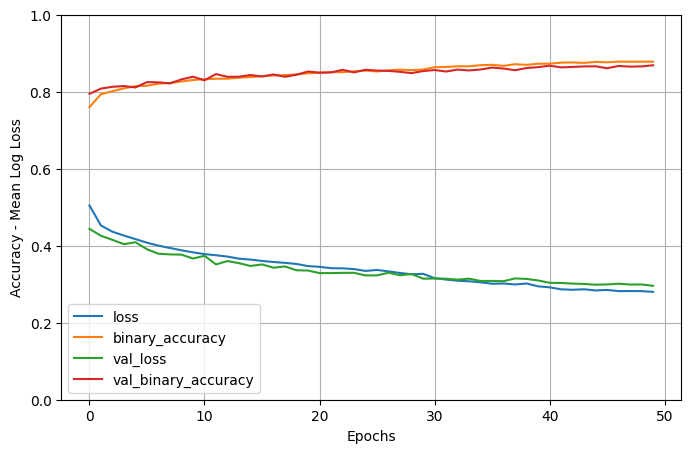

2023-11-29 20:23:56.885295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 20:24:40.365584: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 6 ; learning_rate : 5e-05
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.280179         0.880066  0.296154             0.868211
1  0.276884         0.878722  0.297826             0.865178
2  0.277851         0.878309  0.297517             0.866281
3  0.280278         0.878619  0.297645             0.867108
4  0.279178         0.880204  0.296648             0.867935
5  0.277953         0.878860  0.297143             0.869313
6  0.277665         0.879239  0.297150             0.867659
7  0.278258         0.879308  0.297658             0.866832
8  0.275945         0.879963  0.296981             0.865454
9  0.277863         0.876930  0.297026             0.868211


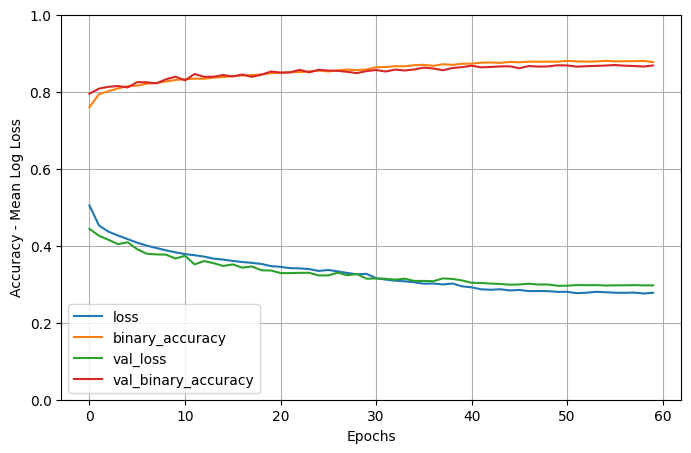

2023-11-29 20:30:43.112371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 20:31:26.491203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 7 ; learning_rate : 1e-05
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.274952         0.881376  0.298028             0.868486
1  0.274586         0.879308  0.296791             0.868211
2  0.276001         0.878825  0.296204             0.869313
3  0.273425         0.881548  0.296835             0.869038
4  0.275847         0.879377  0.297676             0.868762
5  0.275588         0.880618  0.297259             0.867935
6  0.276231         0.880824  0.296664             0.868211
7  0.274688         0.880549  0.296659             0.867659
8  0.277487         0.881238  0.297005             0.867384
9  0.277038         0.879653  0.296613             0.867384


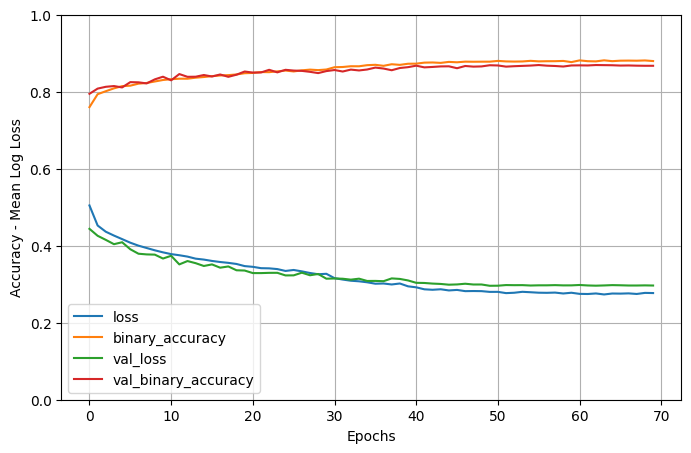

2023-11-29 20:37:31.605529: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 20:38:17.569617: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 8 ; learning_rate : 5e-06
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.273384         0.882031  0.296772             0.867659
1  0.274698         0.881100  0.296528             0.868486
2  0.276745         0.879928  0.296421             0.867384
3  0.274969         0.882961  0.295856             0.869038
4  0.272992         0.880790  0.296710             0.866281
5  0.275182         0.880928  0.296131             0.868486
6  0.273007         0.882272  0.296401             0.867659
7  0.273791         0.882927  0.296693             0.868211
8  0.271885         0.880893  0.296725             0.868762
9  0.275971         0.879205  0.296142             0.869038


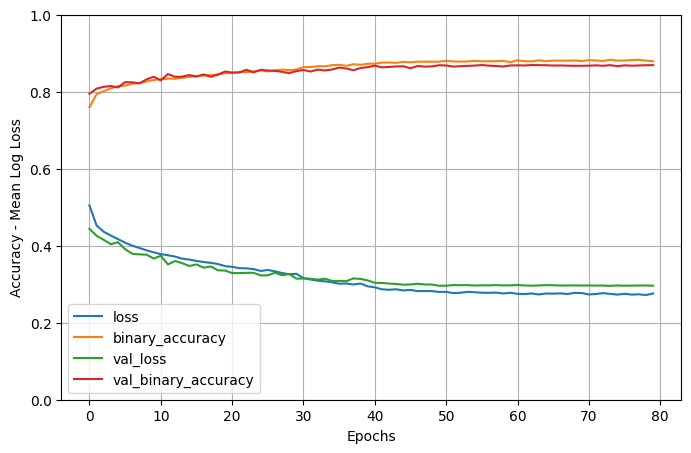

2023-11-29 20:44:19.875441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 20:45:05.770907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 9 ; learning_rate : 1.0000000000000002e-06
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.275462         0.881893  0.296709             0.867935
1  0.277946         0.879446  0.296536             0.868762
2  0.276422         0.878963  0.296556             0.867108
3  0.273510         0.880790  0.296368             0.868486
4  0.275294         0.880376  0.296516             0.867108
5  0.275318         0.879067  0.296672             0.867384
6  0.274400         0.882582  0.296195             0.869589
7  0.276265         0.879308  0.296775             0.867935
8  0.274975         0.880962  0.296365             0.867108
9  0.275190         0.880893  0.296251             0.868486


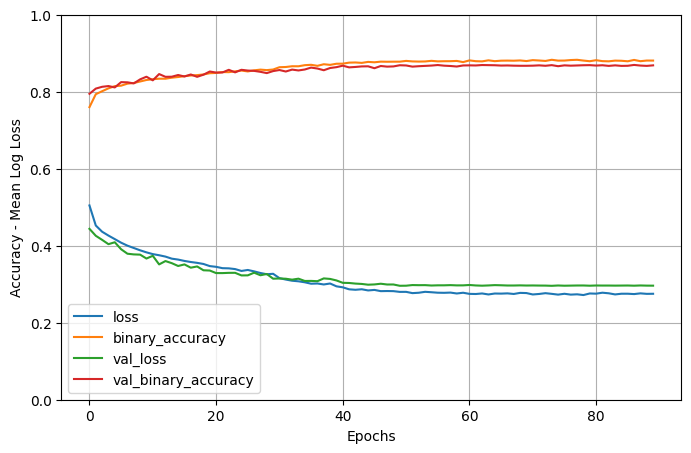

In [9]:
mt.auto_fit(model24, X_train, t_train, X_val, t_val,
            auto_plot=True, epochs_per_step=10, ac_increase_range=0.3)

## Attempt 25

### Activation Change

In [9]:
from model_trainer import ModelTrainer
mt = ModelTrainer()

In [8]:
from keras.models import Sequential

model25 = Sequential(name='model25')

layer_sizes = [1024, 512, 256, 128, 64, 32, 16]
dropout_rates = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.35]

model25.add(keras.layers.Input(shape=input_shape))

for i, layer_size in enumerate(layer_sizes):
    model25.add(keras.layers.Dense(units=layer_size,
                                   activation=keras.activations.selu,
                                   kernel_initializer=keras.initializers.LecunNormal(
                                       seed=seed)))
    model25.add(keras.layers.LayerNormalization())
    model25.add(keras.layers.BatchNormalization())
    model25.add(keras.layers.Dropout(dropout_rates[i]))
model25.add(keras.layers.Dense(units=output_shape, activation=keras.activations.sigmoid,
                               kernel_initializer=keras.initializers.GlorotNormal(seed=seed)))
model25.summary()

2023-11-29 21:05:56.605811: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-29 21:05:56.605844: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-29 21:05:56.605852: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-29 21:05:56.605914: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-29 21:05:56.605938: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              17408     
                                                                 
 layer_normalization (Layer  (None, 1024)              2048      
 Normalization)                                                  
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 layer_normalization_1 (Lay  (None, 512)               1024

2023-11-29 21:06:04.742470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 21:06:48.934402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 1 ; learning_rate : 0.001
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.500896         0.764819  0.442661             0.794596
1  0.445903         0.794631  0.430561             0.806452
2  0.429049         0.803453  0.410353             0.814171
3  0.416839         0.812310  0.396749             0.829611
4  0.408090         0.813930  0.397983             0.811690
5  0.402661         0.815550  0.385032             0.814171
6  0.396826         0.820892  0.385369             0.824648
7  0.390014         0.824200  0.370560             0.840640
8  0.387233         0.826372  0.375977             0.831817
9  0.377420         0.832024  0.364657             0.839813


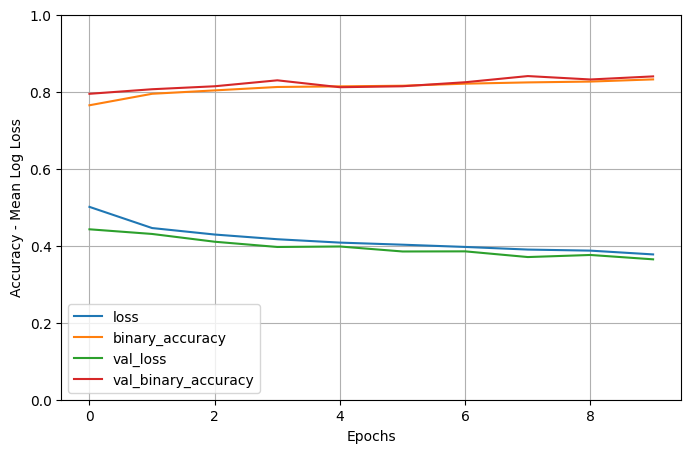

Epoch_step : 2 ; learning_rate : 0.001
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.374004         0.833023  0.367698             0.834850
1  0.369276         0.836952  0.367255             0.829336
2  0.370621         0.836711  0.353530             0.835953
3  0.362276         0.838331  0.348064             0.841743
4  0.360112         0.839778  0.342613             0.850841
5  0.358844         0.843672  0.340668             0.846154
6  0.355147         0.842845  0.344691             0.846154
7  0.352948         0.843983  0.329483             0.853598
8  0.349787         0.846774  0.340552             0.845602
9  0.343935         0.847532  0.335051             0.850565


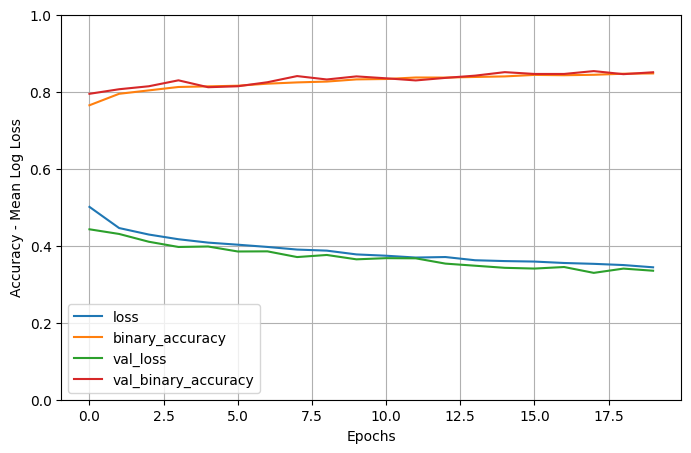

Epoch_step : 3 ; learning_rate : 0.001
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.342405         0.851358  0.347065             0.836780
1  0.341231         0.850083  0.332269             0.855252
2  0.338687         0.850600  0.324618             0.853874
3  0.335036         0.853770  0.327094             0.855252
4  0.336593         0.853184  0.326422             0.850841
5  0.332801         0.856596  0.334982             0.846981
6  0.332508         0.856045  0.329786             0.856355
7  0.328490         0.857251  0.320813             0.854701
8  0.324529         0.857423  0.339761             0.840915
9  0.324316         0.860215  0.322613             0.855804


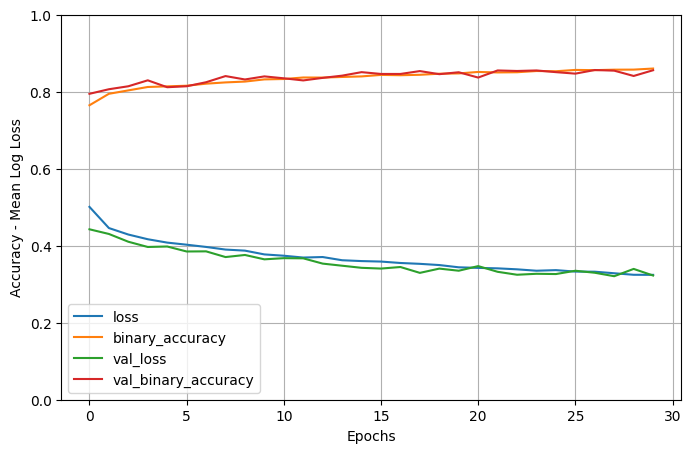

2023-11-29 21:26:36.528547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 21:27:18.821235: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 4 ; learning_rate : 0.0005
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.316222         0.862938  0.310173             0.857182
1  0.312107         0.863799  0.310066             0.860491
2  0.306119         0.868452  0.313880             0.860215
3  0.305196         0.867694  0.307538             0.861042
4  0.306320         0.867073  0.306773             0.863248
5  0.301708         0.872208  0.308744             0.862696
6  0.306533         0.868969  0.312537             0.859112
7  0.300878         0.869210  0.313014             0.857182
8  0.298293         0.870485  0.316511             0.853598
9  0.295104         0.871347  0.304699             0.863248


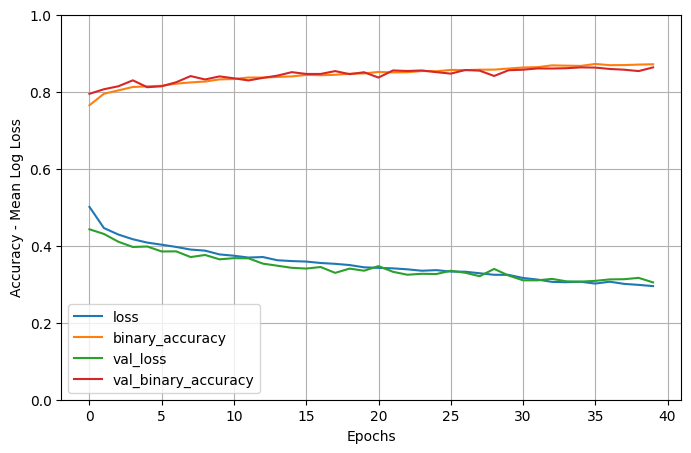

2023-11-29 21:33:38.304715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 21:34:22.509075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 5 ; learning_rate : 0.0001
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.288633         0.875999  0.300390             0.863524
1  0.288814         0.874655  0.295962             0.867384
2  0.284280         0.877964  0.299177             0.866005
3  0.285446         0.878240  0.300360             0.865178
4  0.284969         0.875896  0.298488             0.867659
5  0.280274         0.879032  0.299079             0.862972
6  0.283307         0.878550  0.299236             0.866005
7  0.281025         0.879928  0.298919             0.864626
8  0.279559         0.878722  0.295998             0.867384
9  0.281548         0.878481  0.296506             0.868211


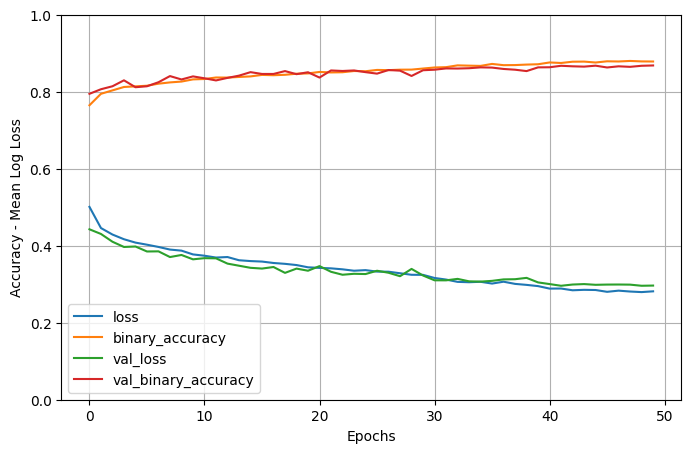

2023-11-29 21:40:36.081360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 21:41:19.298517: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 6 ; learning_rate : 5e-05
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.275282         0.880893  0.296315             0.866005
1  0.277298         0.881893  0.297783             0.865178
2  0.279055         0.878550  0.296571             0.866832
3  0.277706         0.880101  0.297332             0.865454
4  0.277584         0.880066  0.298035             0.865454
5  0.277437         0.879170  0.296028             0.866832
6  0.276524         0.880824  0.297123             0.866005
7  0.278172         0.880790  0.297294             0.865729
8  0.277932         0.879859  0.298568             0.864075
9  0.274087         0.881203  0.298487             0.865454


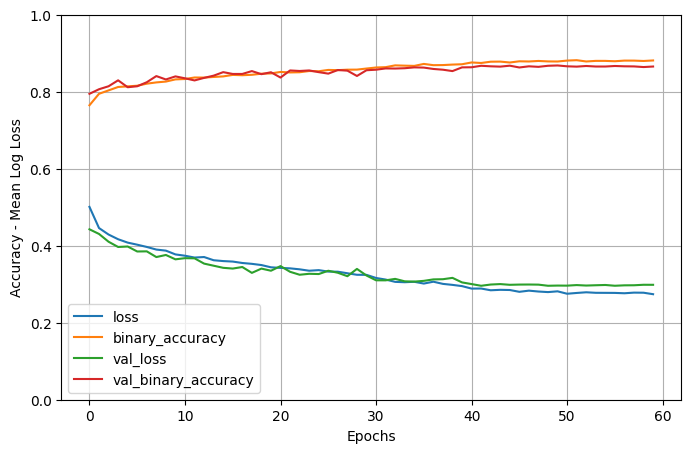

2023-11-29 21:47:21.110926: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 21:48:04.630442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 7 ; learning_rate : 1e-05
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.274740         0.881789  0.298028             0.865178
1  0.277094         0.879170  0.296647             0.865178
2  0.273761         0.881272  0.297611             0.864626
3  0.276866         0.879515  0.296946             0.864626
4  0.274026         0.883099  0.296613             0.866281
5  0.274626         0.880307  0.296525             0.866005
6  0.273716         0.882789  0.296794             0.864351
7  0.274985         0.881135  0.297578             0.866005
8  0.274886         0.880790  0.297365             0.864351
9  0.274282         0.882651  0.297302             0.866005


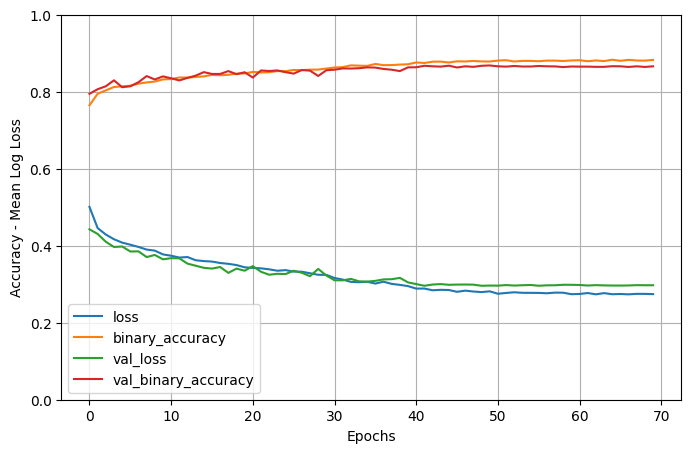

2023-11-29 21:54:07.740022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 21:54:52.897002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 8 ; learning_rate : 5e-06
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.275734         0.880101  0.297778             0.866005
1  0.275924         0.880583  0.297181             0.865178
2  0.272749         0.883857  0.296717             0.865178
3  0.274605         0.881720  0.296262             0.866005
4  0.273937         0.881548  0.296328             0.866281
5  0.274746         0.883237  0.296691             0.865178
6  0.274041         0.881307  0.296137             0.866005
7  0.274893         0.880790  0.296450             0.865454
8  0.272235         0.881927  0.297633             0.865178
9  0.275453         0.880928  0.297331             0.866281


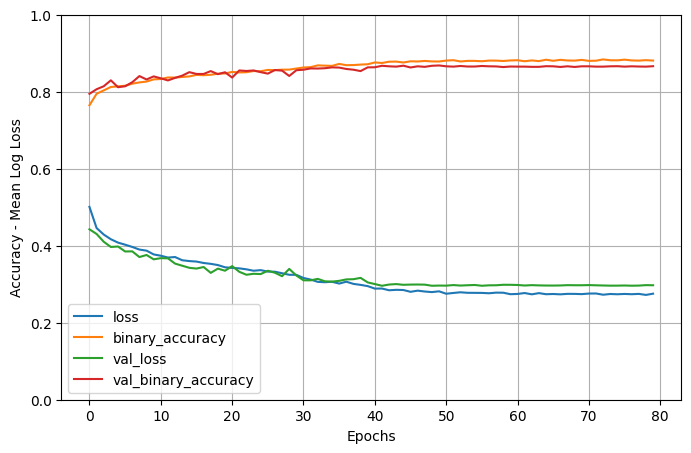

2023-11-29 22:00:56.416874: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 22:01:42.467891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 9 ; learning_rate : 1.0000000000000002e-06
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.275542         0.880721  0.295905             0.866832
1  0.272709         0.882203  0.297343             0.866281
2  0.272164         0.883237  0.297702             0.865729
3  0.272477         0.882237  0.296803             0.867108
4  0.271623         0.881272  0.297315             0.864902
5  0.275561         0.882548  0.297314             0.865729
6  0.274367         0.881996  0.296961             0.864351
7  0.271605         0.882892  0.297252             0.865729
8  0.273247         0.881445  0.296735             0.866005
9  0.271660         0.882306  0.296817             0.864351


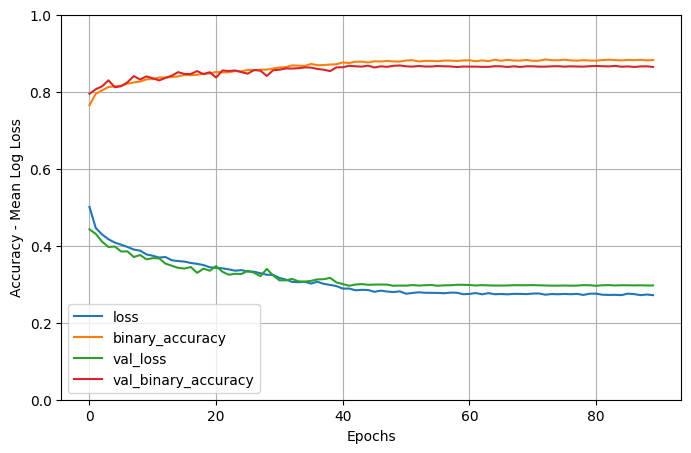

In [9]:
mt.auto_fit(model25, X_train, t_train, X_val, t_val,
            auto_plot=True, epochs_per_step=10, ac_increase_range=0.3)

### Dropout Change

In [7]:
from keras.models import Sequential

model26 = Sequential(name='model26')

layer_sizes = [1024, 512, 256, 128, 64, 32, 16]
dropout_rates = [0.05, 0.1, 0.15, 0.15, 0.2, 0.2, 0.25]

model26.add(keras.layers.Input(shape=input_shape))

for i, layer_size in enumerate(layer_sizes):
    model26.add(keras.layers.Dense(units=layer_size,
                                   activation=keras.activations.selu,
                                   kernel_initializer=keras.initializers.LecunNormal(
                                       seed=seed)))
    model26.add(keras.layers.LayerNormalization())
    model26.add(keras.layers.BatchNormalization())
    model26.add(keras.layers.Dropout(dropout_rates[i]))
model26.add(keras.layers.Dense(units=output_shape, activation=keras.activations.sigmoid,
                               kernel_initializer=keras.initializers.GlorotNormal(seed=seed)))
model26.summary()

2023-11-29 23:12:44.228119: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-29 23:12:44.228148: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-29 23:12:44.228155: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-29 23:12:44.228428: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-29 23:12:44.228453: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              17408     
                                                                 
 layer_normalization (Layer  (None, 1024)              2048      
 Normalization)                                                  
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 layer_normalization_1 (Lay  (None, 512)               1024

2023-11-29 23:13:04.294025: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 23:13:46.814447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 1 ; learning_rate : 0.001
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.482521         0.770920  0.428221             0.802316
1  0.435383         0.799731  0.415416             0.811690
2  0.422875         0.806245  0.406109             0.810587
3  0.411448         0.810829  0.395403             0.815826
4  0.404330         0.817377  0.389430             0.818307
5  0.396141         0.821857  0.387968             0.820789
6  0.391220         0.826992  0.366970             0.837055
7  0.386804         0.827371  0.362901             0.837607
8  0.381020         0.830473  0.359711             0.839261
9  0.373766         0.832541  0.362636             0.837331


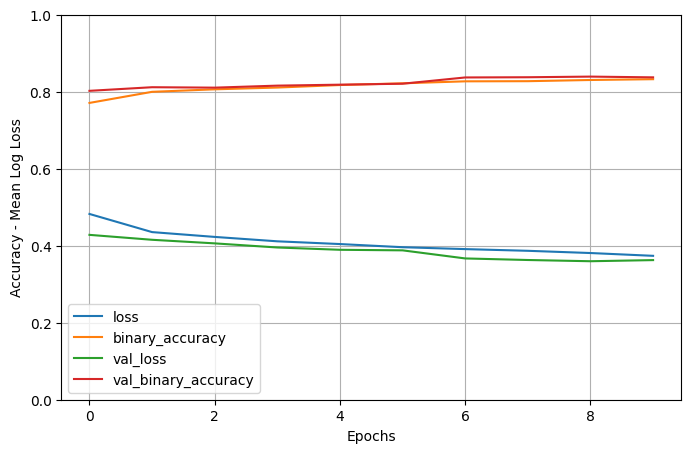

Epoch_step : 2 ; learning_rate : 0.001
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.369843         0.835194  0.350600             0.841743
1  0.369379         0.834712  0.352701             0.840364
2  0.365146         0.836814  0.342668             0.842018
3  0.354929         0.842845  0.334639             0.850290
4  0.357032         0.841536  0.345851             0.840915
5  0.349777         0.845361  0.336735             0.845051
6  0.350851         0.844982  0.341669             0.849462
7  0.345408         0.850255  0.329414             0.856907
8  0.340750         0.852116  0.330389             0.849187
9  0.337366         0.852530  0.331983             0.843672


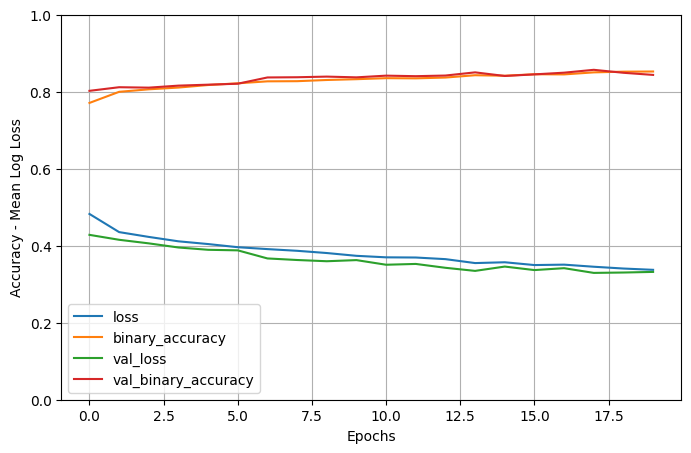

Epoch_step : 3 ; learning_rate : 0.001
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.339028         0.852392  0.339916             0.847257
1  0.334024         0.854253  0.347190             0.840915
2  0.332099         0.856148  0.340312             0.841191
3  0.327943         0.856665  0.324190             0.856907
4  0.326905         0.857940  0.336864             0.840364
5  0.322666         0.860387  0.324363             0.855804
6  0.324723         0.859043  0.327085             0.850841
7  0.318674         0.861421  0.319795             0.855804
8  0.315923         0.862352  0.317265             0.856355
9  0.316194         0.861869  0.328326             0.845878


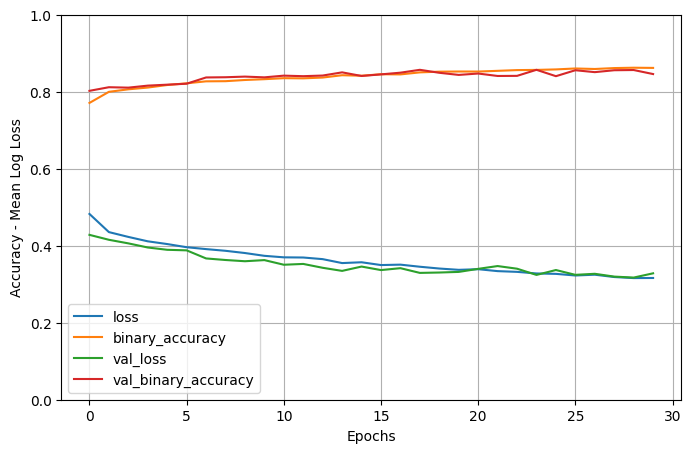

Epoch_step : 4 ; learning_rate : 0.001
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.315624         0.862111  0.342970             0.844775
1  0.314211         0.864213  0.315122             0.853598
2  0.311736         0.865764  0.310907             0.858009
3  0.310406         0.869107  0.314384             0.857734
4  0.305428         0.865970  0.315860             0.857734
5  0.308018         0.865109  0.307397             0.856907
6  0.302925         0.869279  0.322419             0.854701
7  0.301893         0.870726  0.315346             0.854977
8  0.301345         0.869245  0.313973             0.861318
9  0.297439         0.870485  0.308777             0.864902


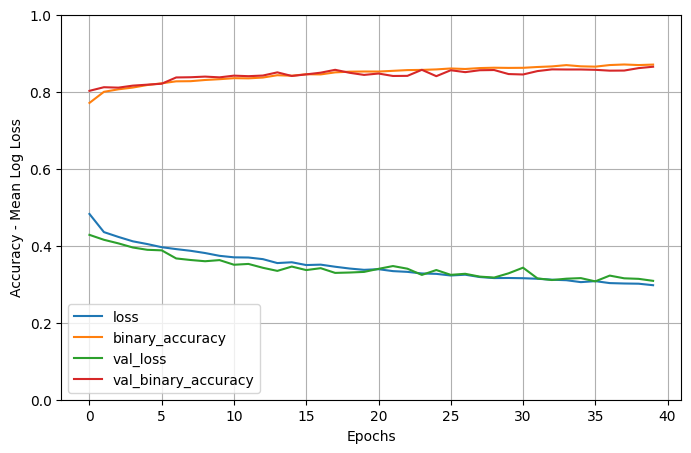

Epoch_step : 5 ; learning_rate : 0.001
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.298213         0.871760  0.316491             0.857182
1  0.297035         0.873139  0.316083             0.860766
2  0.292803         0.874138  0.315303             0.860766
3  0.295162         0.870623  0.308811             0.865729
4  0.289238         0.874414  0.309185             0.861318
5  0.290280         0.874518  0.319168             0.855252
6  0.289776         0.874207  0.304353             0.863524
7  0.287980         0.875482  0.304503             0.861042
8  0.285289         0.877481  0.314616             0.859388
9  0.283545         0.876585  0.323414             0.856355


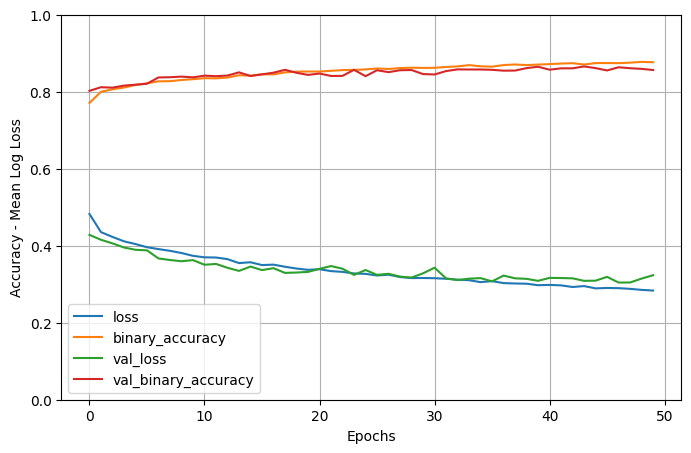

2023-11-29 23:46:58.718976: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 23:47:40.519574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 6 ; learning_rate : 0.0005
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.273087         0.882306  0.301159             0.867384
1  0.269428         0.882306  0.298109             0.870692
2  0.264890         0.885546  0.295477             0.871519
3  0.266175         0.883754  0.299049             0.867384
4  0.263270         0.886614  0.299858             0.864075
5  0.263238         0.883926  0.301296             0.869589
6  0.262305         0.885684  0.298807             0.867108
7  0.260998         0.887166  0.303128             0.861318
8  0.256757         0.887683  0.300227             0.867108
9  0.254271         0.889371  0.302915             0.868211


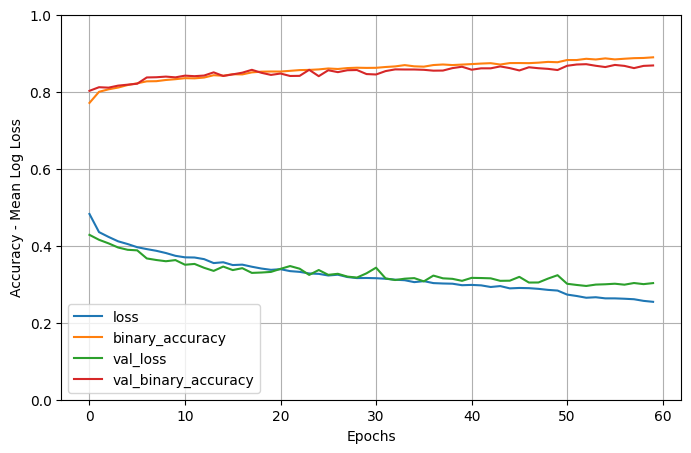

2023-11-29 23:53:57.466417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 23:54:40.539351: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 7 ; learning_rate : 0.0001
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.246933         0.891749  0.300370             0.867384
1  0.243964         0.894127  0.301784             0.868762
2  0.245233         0.893679  0.300515             0.868211
3  0.245410         0.893128  0.300420             0.870416
4  0.240131         0.896436  0.301540             0.871795
5  0.244671         0.894438  0.300579             0.867659
6  0.241631         0.896023  0.299545             0.869313
7  0.240136         0.895023  0.302110             0.869589
8  0.240577         0.894644  0.301723             0.869313
9  0.240764         0.894886  0.301325             0.869589


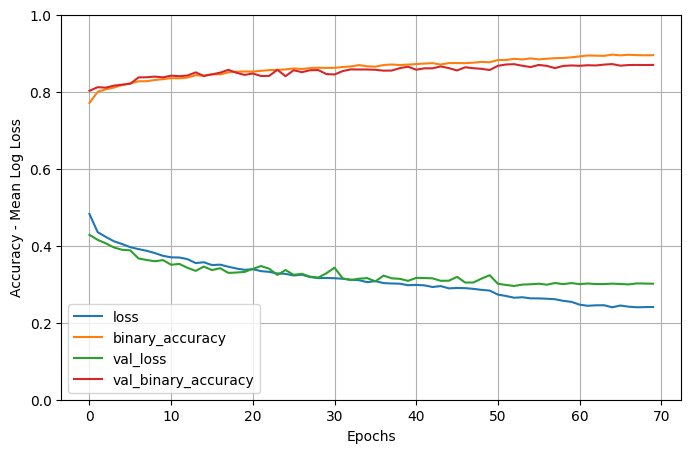

2023-11-30 00:00:46.611911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-30 00:01:29.956443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 8 ; learning_rate : 5e-05
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.236669         0.896712  0.302134             0.870416
1  0.241149         0.894334  0.299634             0.869313
2  0.238634         0.894851  0.302128             0.869313
3  0.233589         0.897884  0.300622             0.870141
4  0.238409         0.895334  0.301481             0.869589
5  0.236748         0.896816  0.302696             0.871243
6  0.233528         0.898987  0.301236             0.872346
7  0.233467         0.896574  0.303214             0.872346
8  0.233627         0.898780  0.302398             0.871243
9  0.233559         0.899159  0.304159             0.871795


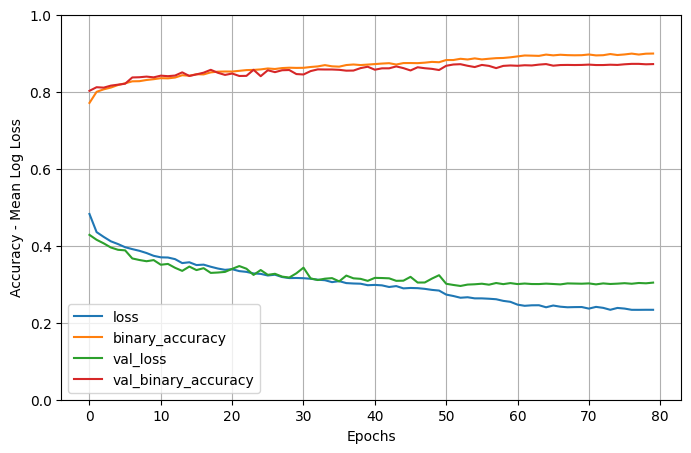

2023-11-30 00:07:38.164395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-30 00:08:22.134863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 9 ; learning_rate : 1e-05
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.232739         0.898297  0.304222             0.867384
1  0.231711         0.900675  0.303868             0.870416
2  0.236084         0.896471  0.303986             0.870968
3  0.236556         0.897436  0.303127             0.869313
4  0.234819         0.896747  0.303266             0.869589
5  0.234250         0.897022  0.303502             0.871519
6  0.236558         0.895575  0.303037             0.869865
7  0.234656         0.898401  0.303212             0.870141
8  0.235585         0.897264  0.302867             0.869865
9  0.233476         0.897505  0.302514             0.870692


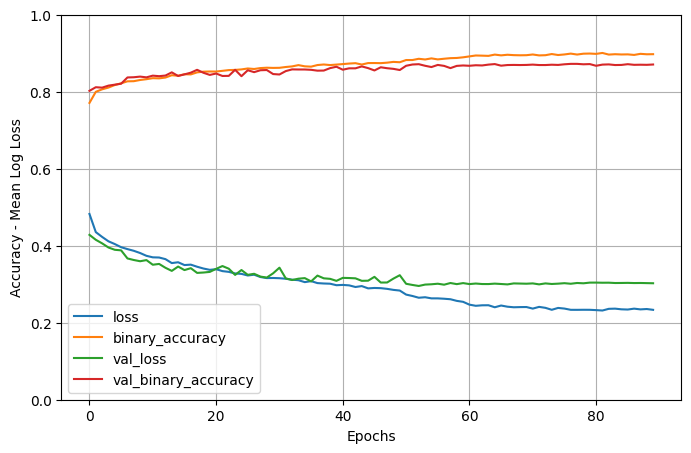

2023-11-30 00:14:35.001350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-30 00:15:20.904065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 10 ; learning_rate : 5e-06
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.231735         0.900296  0.303405             0.869865
1  0.231697         0.898573  0.303095             0.870692
2  0.234308         0.897022  0.302370             0.870141
3  0.234016         0.897953  0.302172             0.870968
4  0.235222         0.895230  0.303564             0.869038
5  0.232908         0.897781  0.303173             0.870692
6  0.232568         0.897677  0.302959             0.870416
7  0.232656         0.898711  0.303470             0.869589
8  0.234203         0.898504  0.303833             0.870416
9  0.233039         0.897539  0.304522             0.869313


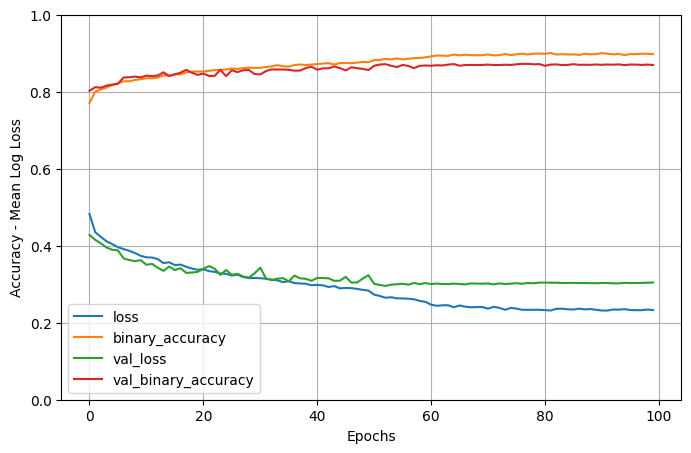

2023-11-30 00:23:01.211887: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-30 00:23:47.674500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 11 ; learning_rate : 1.0000000000000002e-06
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.230183         0.898056  0.303767             0.870968
1  0.233261         0.899400  0.302879             0.871519
2  0.232542         0.898435  0.303494             0.870141
3  0.235476         0.896609  0.304039             0.870968
4  0.233203         0.900021  0.302841             0.869313
5  0.232414         0.899262  0.302258             0.870968
6  0.234066         0.899228  0.303194             0.870416
7  0.238931         0.896126  0.304021             0.871795
8  0.231542         0.898539  0.303934             0.871243
9  0.232403         0.897712  0.303695             0.870968


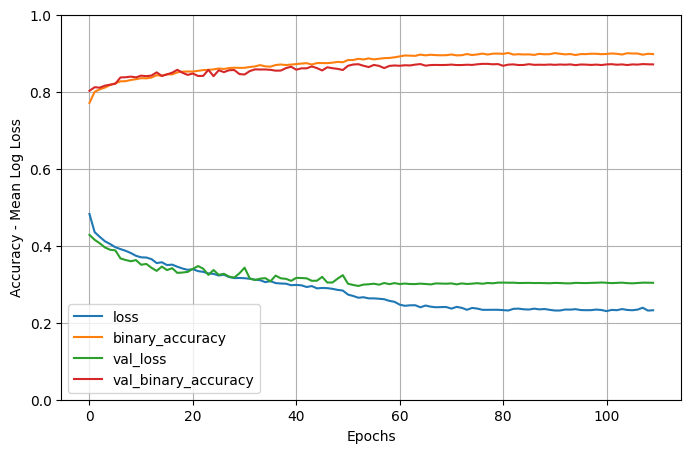

In [10]:
mt.auto_fit(model26, X_train, t_train, X_val, t_val,
            auto_plot=True, epochs_per_step=10, ac_increase_range=0.3)

## Attempt 26

In [7]:
from keras.models import Sequential

model26 = Sequential(name='model26')

layer_sizes = [1024, 512, 256, 128, 64, 32, 16]
#dropout_rates = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.35]

model26.add(keras.layers.Input(shape=input_shape))

#model26.add(keras.layers.Dense(units=2048, activation=keras.activations.selu, use_bias=False, kernel_initializer=keras.initializers.LecunNormal(seed=seed)))


for i, layer_size in enumerate(layer_sizes):
    model26.add(keras.layers.Dense(units=layer_size,
                                   activation=keras.activations.selu,
                                   use_bias=True,
                                   kernel_initializer=keras.initializers.LecunNormal(
                                       seed=seed)))
    model26.add(keras.layers.AlphaDropout(rate=0.05,seed=seed))
model26.add(keras.layers.Dense(units=output_shape, activation=keras.activations.sigmoid,
                               kernel_initializer=keras.initializers.GlorotNormal(seed=seed)))
model26.summary()

2023-11-30 12:38:59.129764: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-30 12:38:59.129802: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-30 12:38:59.129812: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-30 12:38:59.129860: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-30 12:38:59.129884: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              17408     
                                                                 
 alpha_dropout (AlphaDropou  (None, 1024)              0         
 t)                                                              
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 alpha_dropout_1 (AlphaDrop  (None, 512)               0         
 out)                                                            
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 alpha_dropout_2 (AlphaDrop  (None, 256)               0   

In [8]:
from keras.callbacks import LearningRateScheduler

initial_lr = 0.1

def lr_scheduler(epoch):
    return initial_lr * 0.9 ** epoch

lr_callbacks = LearningRateScheduler(lr_scheduler)

optimizer = keras.optimizers.legacy.Adadelta(learning_rate=initial_lr)

model26.compile(optimizer=optimizer, 
                loss=keras.losses.binary_crossentropy,
                metrics=keras.metrics.binary_accuracy)

In [9]:
history = model26.fit(x=X_train, y=t_train, batch_size=128, epochs=80,
                      validation_data=(X_val, t_val), callbacks=[lr_callbacks])
logs = pd.DataFrame(history.history)
logs

Epoch 1/80


2023-11-30 12:39:04.977709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


227/227 [==============================] - ETA: 0s - loss: 0.5014 - binary_accuracy: 0.7565

2023-11-30 12:39:11.361553: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


227/227 [==============================] - 7s 27ms/step - loss: 0.5014 - binary_accuracy: 0.7565 - val_loss: 0.4606 - val_binary_accuracy: 0.7827 - lr: 0.1000
Epoch 2/80
227/227 [==============================] - 6s 25ms/step - loss: 0.4559 - binary_accuracy: 0.7820 - val_loss: 0.4508 - val_binary_accuracy: 0.7690 - lr: 0.0900
Epoch 3/80
227/227 [==============================] - 6s 25ms/step - loss: 0.4411 - binary_accuracy: 0.7898 - val_loss: 0.4381 - val_binary_accuracy: 0.7974 - lr: 0.0810
Epoch 4/80
227/227 [==============================] - 6s 25ms/step - loss: 0.4357 - binary_accuracy: 0.7931 - val_loss: 0.4519 - val_binary_accuracy: 0.7874 - lr: 0.0729
Epoch 5/80
227/227 [==============================] - 6s 25ms/step - loss: 0.4273 - binary_accuracy: 0.7991 - val_loss: 0.4327 - val_binary_accuracy: 0.8034 - lr: 0.0656
Epoch 6/80
227/227 [==============================] - 6s 25ms/step - loss: 0.4220 - binary_accuracy: 0.8004 - val_loss: 0.4462 - val_binary_accuracy: 0.8018 - lr

,loss,binary_accuracy,val_loss,val_binary_accuracy,lr
0,0.501431,0.756548,0.460617,0.782741,0.100000
1,0.455914,0.781982,0.450819,0.768955,0.090000
2,0.441092,0.789840,0.438120,0.797353,0.081000
3,0.435652,0.793149,0.451928,0.787428,0.072900
4,0.427325,0.799076,0.432692,0.803419,0.065610
...,...,...,...,...,...
75,0.386651,0.823856,0.402710,0.819961,0.000037
76,0.385398,0.825131,0.402708,0.819961,0.000033
77,0.386811,0.822512,0.402707,0.819961,0.000030
78,0.387297,0.822994,0.402726,0.819961,0.000027


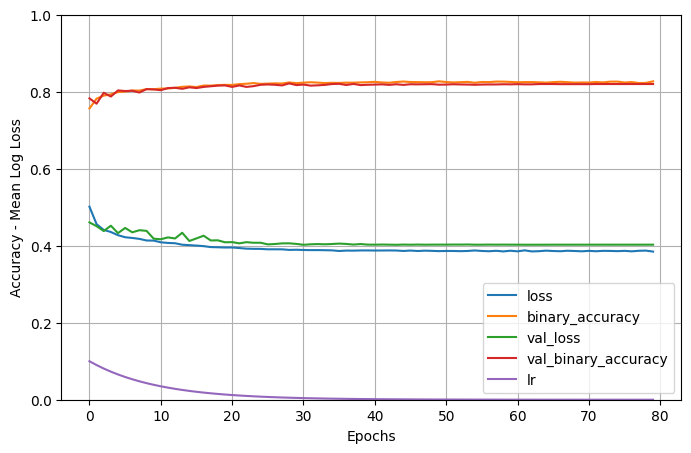

In [10]:
from model_trainer import ModelTrainer
mt = ModelTrainer()
mt.plot_histories([history])

## Attempt 27

Considering advices from [*Deep study of a not very deep neural network*](https://rinat-maksutov.medium.com/deep-study-of-a-not-very-deep-neural-network-part-5-dropout-and-noise-29d980ece933), we are applying a network size proportional to the dropout rates.

Since dropout generates a significant amount of noise in the gradients, you should use a learning rate 100 to 1000 times bigger than with a standard network.


In [4]:
from model_trainer import ModelTrainer
mt = ModelTrainer()

In [5]:
from keras.models import Sequential

model27 = Sequential(name='model27')

layer_sizes = [1024, 512, 256, 128, 64, 32, 16]
dropout_rates = [0.2, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]

model27.add(keras.layers.Input(shape=input_shape))

for i, layer_size in enumerate(layer_sizes):
    # Implementing adaptive model size according to dropout
    model27.add(keras.layers.Dense(units=layer_size/(1-dropout_rates[i]),
                                   activation=keras.activations.elu,
                                   kernel_initializer=keras.initializers.HeUniform(
                                       seed=seed)))
    model27.add(keras.layers.Dropout(dropout_rates[i]))
model27.add(keras.layers.Dense(units=output_shape, activation=keras.activations.sigmoid,
                               kernel_initializer=keras.initializers.GlorotNormal(seed=seed)))
model27.summary()

2023-11-30 19:24:35.331028: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-30 19:24:35.331057: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-30 19:24:35.331064: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-30 19:24:35.331276: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-30 19:24:35.331297: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1280)              21760     
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 640)               819840    
                                                                 
 dropout_1 (Dropout)         (None, 640)               0         
                                                                 
 dense_2 (Dense)             (None, 341)               218581    
                                                                 
 dropout_2 (Dropout)         (None, 341)               0         
                                                                 
 dense_3 (Dense)             (None, 182)               6224

In [6]:
from keras.callbacks import LearningRateScheduler

initial_lr = 0.001
def lr_scheduler(epoch):
    return initial_lr * 0.95 ** epoch

lr_callbacks = LearningRateScheduler(lr_scheduler)

optimizer = keras.optimizers.legacy.Adam(learning_rate=initial_lr)

model27.compile(optimizer=optimizer,
                loss=keras.losses.binary_crossentropy,
                metrics=keras.metrics.binary_accuracy)

In [7]:
history = model27.fit(x=X_train, y=t_train, batch_size=128, epochs=160,
                      validation_data=(X_val, t_val), callbacks=[lr_callbacks])
logs = pd.DataFrame(history.history)
logs

Epoch 1/160


2023-11-30 19:24:55.269835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


227/227 [==============================] - ETA: 0s - loss: 0.6658 - binary_accuracy: 0.7073

2023-11-30 19:25:01.601990: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


227/227 [==============================] - 7s 27ms/step - loss: 0.6658 - binary_accuracy: 0.7073 - val_loss: 0.4712 - val_binary_accuracy: 0.7764 - lr: 0.0010
Epoch 2/160
227/227 [==============================] - 6s 24ms/step - loss: 0.4866 - binary_accuracy: 0.7702 - val_loss: 0.4561 - val_binary_accuracy: 0.7789 - lr: 9.5000e-04
Epoch 3/160
227/227 [==============================] - 5s 24ms/step - loss: 0.4521 - binary_accuracy: 0.7849 - val_loss: 0.4381 - val_binary_accuracy: 0.7747 - lr: 9.0250e-04
Epoch 4/160
227/227 [==============================] - 5s 24ms/step - loss: 0.4396 - binary_accuracy: 0.7937 - val_loss: 0.4660 - val_binary_accuracy: 0.7731 - lr: 8.5737e-04
Epoch 5/160
227/227 [==============================] - 5s 24ms/step - loss: 0.4318 - binary_accuracy: 0.7979 - val_loss: 0.4272 - val_binary_accuracy: 0.7896 - lr: 8.1451e-04
Epoch 6/160
227/227 [==============================] - 6s 26ms/step - loss: 0.4175 - binary_accuracy: 0.8043 - val_loss: 0.4485 - val_binary_

,loss,binary_accuracy,val_loss,val_binary_accuracy,lr
0,0.665818,0.707265,0.471157,0.776399,1.000000e-03
1,0.486550,0.770196,0.456100,0.778881,9.500000e-04
2,0.452052,0.784912,0.438085,0.774745,9.025000e-04
3,0.439561,0.793666,0.466010,0.773091,8.573750e-04
4,0.431811,0.797939,0.427201,0.789633,8.145063e-04
...,...,...,...,...,...
155,0.268238,0.881720,0.309934,0.859664,3.524998e-07
156,0.269748,0.881066,0.309998,0.859939,3.348748e-07
157,0.268093,0.881652,0.309992,0.859939,3.181310e-07
158,0.267173,0.881272,0.309981,0.859664,3.022245e-07


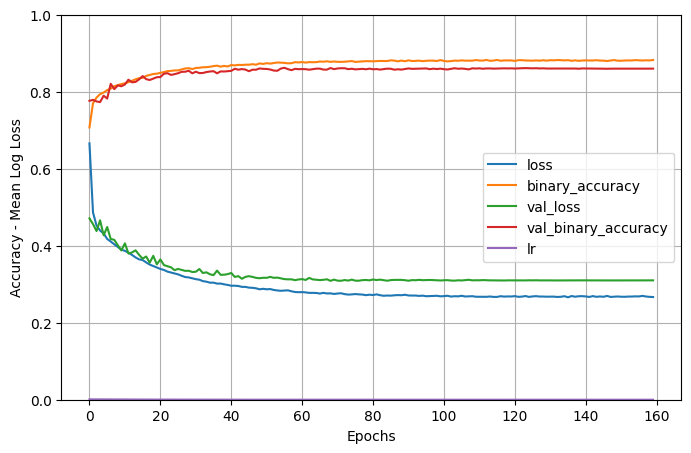

In [8]:
mt.plot_histories([history])

2023-11-30 18:35:31.750783: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-30 18:35:52.397078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 1 ; learning_rate : 0.001
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.520492         0.752895  0.474056             0.768955
1  0.440765         0.791494  0.440516             0.792666
2  0.418448         0.804556  0.413645             0.797629
3  0.401828         0.814723  0.395419             0.814171
4  0.385558         0.824752  0.388753             0.824924
5  0.378254         0.826234  0.396699             0.826303
6  0.369313         0.834953  0.370919             0.826303
7  0.360431         0.841398  0.371671             0.828784
8  0.355649         0.843638  0.366179             0.830163
9  0.343526         0.849187  0.347788             0.840640


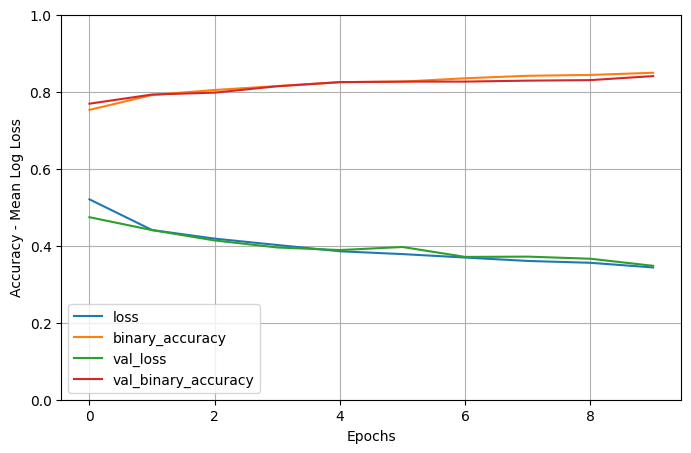

Epoch_step : 2 ; learning_rate : 0.001
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.332876         0.854218  0.348220             0.846430
1  0.334339         0.853357  0.371802             0.825751
2  0.326275         0.856148  0.342807             0.845051
3  0.322194         0.858733  0.336172             0.837607
4  0.318085         0.859491  0.331868             0.848084
5  0.316364         0.861559  0.335206             0.846154
6  0.310204         0.863937  0.338120             0.850565
7  0.338935         0.854563  0.341150             0.843121
8  0.314368         0.861249  0.337130             0.853047
9  0.304261         0.866522  0.327517             0.853322


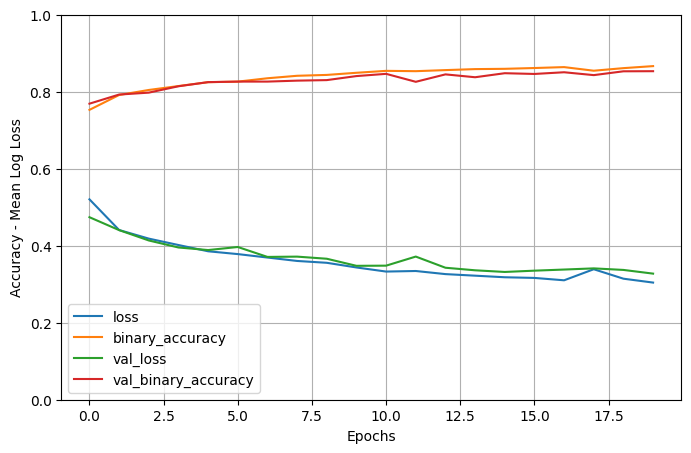

Epoch_step : 3 ; learning_rate : 0.001
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.300728         0.866453  0.350721             0.840088
1  0.301694         0.867625  0.340739             0.846705
2  0.322618         0.865695  0.331472             0.848360
3  0.295531         0.870210  0.320572             0.849187
4  0.291994         0.870416  0.332288             0.843397
5  0.292798         0.870658  0.321200             0.855804
6  0.293059         0.871864  0.319590             0.859664
7  0.295599         0.869141  0.320453             0.854701
8  0.291304         0.873036  0.327203             0.857734
9  0.290488         0.872002  0.323841             0.853874


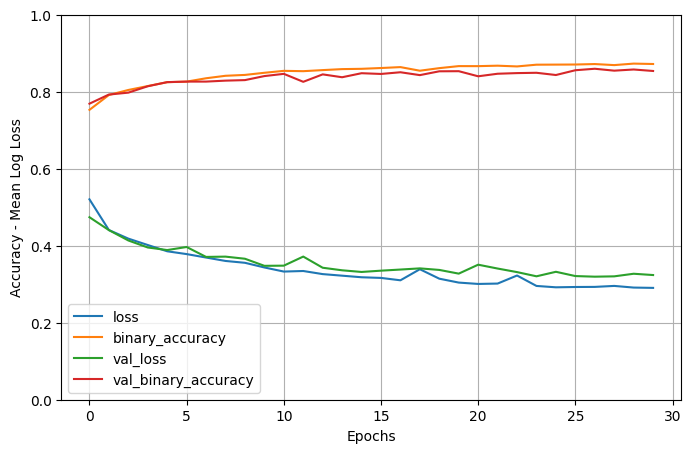

Epoch_step : 4 ; learning_rate : 0.001
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.285268         0.873759  0.322172             0.855252
1  0.283842         0.875827  0.312706             0.861318
2  0.296691         0.868452  0.325406             0.858009
3  0.285104         0.873242  0.322689             0.858561
4  0.283100         0.874552  0.323370             0.856079
5  0.283422         0.872725  0.325579             0.859939
6  0.279875         0.874104  0.323702             0.856907
7  0.276069         0.877240  0.314865             0.857182
8  0.277726         0.877964  0.342399             0.843397
9  0.274507         0.878343  0.322183             0.864626


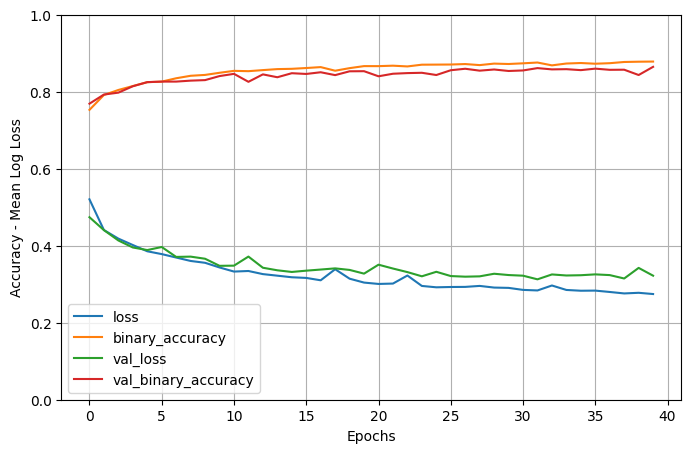

2023-11-30 18:48:53.002238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-30 18:49:12.772512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 5 ; learning_rate : 0.0005
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.257889         0.885408  0.317208             0.865178
1  0.272084         0.885891  0.326746             0.858285
2  0.257906         0.884650  0.310687             0.866832
3  0.247320         0.890233  0.315801             0.867108
4  0.245367         0.889440  0.312470             0.864902
5  0.480729         0.886993  0.324232             0.860491
6  0.249394         0.889578  0.321431             0.869313
7  0.242527         0.891577  0.324112             0.867384
8  0.238610         0.892749  0.326527             0.870416
9  0.239285         0.892818  0.331036             0.863799


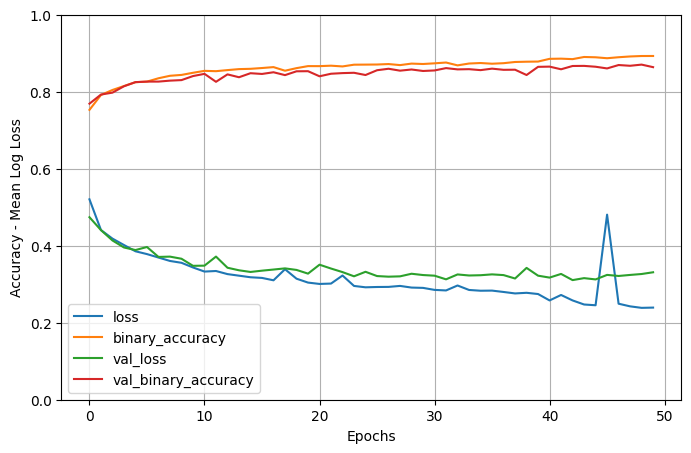

2023-11-30 18:52:13.685596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-30 18:52:34.111210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 6 ; learning_rate : 0.0001
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.229203         0.897160  0.332251             0.866005
1  0.224996         0.899538  0.331725             0.865729
2  0.222682         0.898608  0.340745             0.864351
3  0.221427         0.899642  0.342371             0.868211
4  0.222797         0.899400  0.341560             0.866556
5  0.221025         0.900848  0.342703             0.868211
6  0.219031         0.901330  0.350127             0.862696
7  0.217673         0.902571  0.348239             0.865178
8  0.218275         0.902881  0.352660             0.866281
9  0.216302         0.903364  0.360023             0.863248


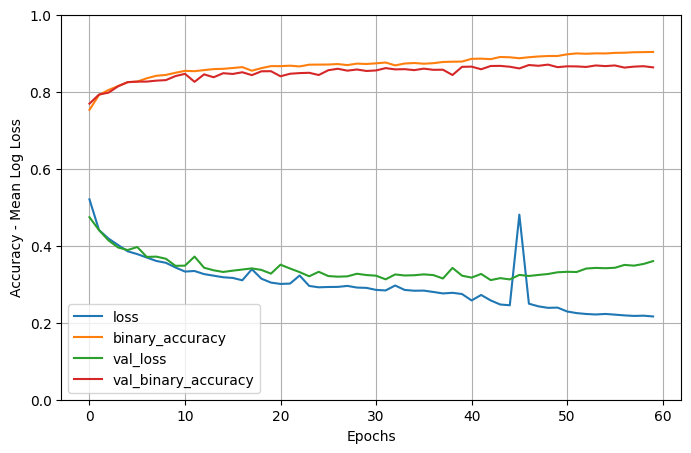

2023-11-30 18:55:37.271568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-30 18:55:56.796595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch_step : 7 ; learning_rate : 5e-05
       loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.220962         0.902502  0.357320             0.865729
1  0.213195         0.903605  0.358213             0.867659
2  0.212446         0.904915  0.365539             0.867108
3  0.212053         0.905018  0.364936             0.865454
4  0.212007         0.904432  0.367316             0.868211
5  0.212396         0.905811  0.367828             0.866281
6  0.211325         0.904260  0.373190             0.864626
7  0.211285         0.905466  0.374377             0.864626
8  0.210980         0.905052  0.375453             0.866005
9  0.209562         0.905742  0.379012             0.864902


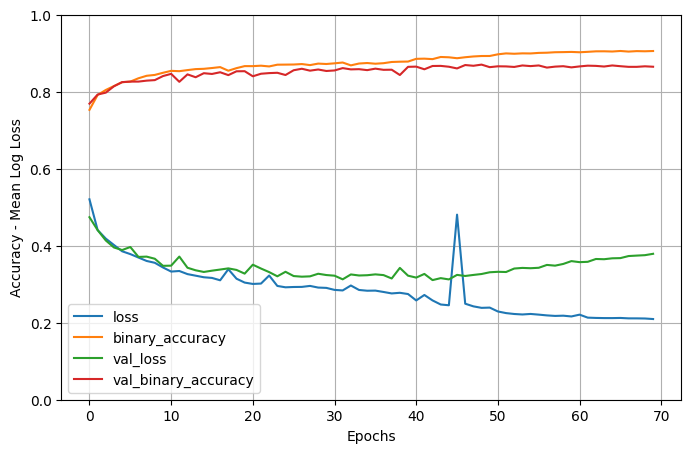

2023-11-30 18:58:58.467689: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


KeyboardInterrupt: 

In [9]:
mt.auto_fit(model23, X_train, t_train, X_val, t_val,
            auto_plot=True, epochs_per_step=10, ac_increase_range=0.3)

### Next network to try :

* Increase batch size to 128
* Change optimizer to Adadelta or Adamax
* Change learning rate (high dropout means lr 100 to 1000 times bigger)
* Change activation to SELU *(Scaled Exponential Linear Unit)* with AlphaDropout

## Attempt 28

In [4]:
from keras.models import Sequential

model28 = Sequential(name='model28')

layer_sizes = [1024, 512, 256, 128, 64, 32, 16]
dropout_rates = [0.2, 0.2, 0.25, 0.3, 0.35, 0.4, 0.4]

model28.add(keras.layers.Input(shape=input_shape))

for i, layer_size in enumerate(layer_sizes):
    # Implementing adaptive model size according to dropout
    model28.add(keras.layers.Dense(units=layer_size/(1-dropout_rates[i]),
                                   activation=keras.activations.selu,
                                   kernel_initializer=keras.initializers.LecunNormal(
                                       seed=seed)))
    model28.add(keras.layers.AlphaDropout(dropout_rates[i]))
model28.add(keras.layers.Dense(units=output_shape, activation=keras.activations.sigmoid,
                               kernel_initializer=keras.initializers.GlorotNormal(seed=seed)))
model28.summary()

2023-11-30 20:25:09.161540: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-30 20:25:09.161563: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-30 20:25:09.161576: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-30 20:25:09.161609: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-30 20:25:09.161625: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1280)              21760     
                                                                 
 alpha_dropout (AlphaDropou  (None, 1280)              0         
 t)                                                              
                                                                 
 dense_1 (Dense)             (None, 640)               819840    
                                                                 
 alpha_dropout_1 (AlphaDrop  (None, 640)               0         
 out)                                                            
                                                                 
 dense_2 (Dense)             (None, 341)               218581    
                                                                 
 alpha_dropout_2 (AlphaDrop  (None, 341)               0   

In [5]:
model28.compile(optimizer=keras.optimizers.legacy.Adadelta(learning_rate=0.1),
                loss=keras.losses.binary_crossentropy,
                metrics=keras.metrics.binary_accuracy)

In [6]:
history = model28.fit(x=X_train, y=t_train, batch_size=128, epochs=300,
                      validation_data=(X_val, t_val))
logs = pd.DataFrame(history.history)
logs

Epoch 1/300


2023-11-30 20:25:14.217257: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


227/227 [==============================] - ETA: 0s - loss: 0.6417 - binary_accuracy: 0.6522

2023-11-30 20:25:21.150331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


227/227 [==============================] - 8s 30ms/step - loss: 0.6417 - binary_accuracy: 0.6522 - val_loss: 1.9309 - val_binary_accuracy: 0.7546
Epoch 2/300
227/227 [==============================] - 6s 27ms/step - loss: 0.5034 - binary_accuracy: 0.7579 - val_loss: 2.6887 - val_binary_accuracy: 0.7361
Epoch 3/300
227/227 [==============================] - 6s 27ms/step - loss: 0.4750 - binary_accuracy: 0.7734 - val_loss: 3.0762 - val_binary_accuracy: 0.7758
Epoch 4/300
227/227 [==============================] - 6s 27ms/step - loss: 0.4654 - binary_accuracy: 0.7792 - val_loss: 2.9172 - val_binary_accuracy: 0.7775
Epoch 5/300
227/227 [==============================] - 6s 27ms/step - loss: 0.4601 - binary_accuracy: 0.7857 - val_loss: 2.8226 - val_binary_accuracy: 0.7734
Epoch 6/300
227/227 [==============================] - 6s 28ms/step - loss: 0.4576 - binary_accuracy: 0.7829 - val_loss: 2.8426 - val_binary_accuracy: 0.7827
Epoch 7/300
227/227 [==============================] - 6s 27ms/s

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.641705,0.652226,1.930941,0.754618
1,0.503384,0.757858,2.688702,0.736146
2,0.474983,0.773366,3.076165,0.775848
3,0.465378,0.779225,2.917241,0.777502
4,0.460118,0.785739,2.822577,0.773366
...,...,...,...,...
295,0.308683,0.862628,1.620742,0.843121
296,0.307504,0.866350,1.755414,0.837607
297,0.306072,0.864489,1.534352,0.842294
298,0.306982,0.865591,1.668458,0.845327


## Attempt 29

In [4]:
from keras.models import Sequential

model29 = Sequential(name='model29')

layer_sizes = [1024, 512, 256, 128, 64, 32, 16]
dropout_rates = [0.2, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]

model29.add(keras.layers.Input(shape=input_shape))

for i, layer_size in enumerate(layer_sizes):
    # Implementing adaptive model size according to dropout
    model29.add(keras.layers.Dense(units=layer_size/(1-dropout_rates[i]),
                                   activation=keras.activations.selu,
                                   kernel_initializer=keras.initializers.LecunNormal(
                                       seed=seed)))
    model29.add(keras.layers.AlphaDropout(dropout_rates[i]))
model29.add(keras.layers.Dense(units=output_shape, activation=keras.activations.sigmoid,
                               kernel_initializer=keras.initializers.GlorotNormal(seed=seed)))
model29.summary()

2023-11-30 21:04:43.951123: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-30 21:04:43.951162: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-30 21:04:43.951167: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-30 21:04:43.951222: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-30 21:04:43.951246: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1280)              21760     
                                                                 
 alpha_dropout (AlphaDropou  (None, 1280)              0         
 t)                                                              
                                                                 
 dense_1 (Dense)             (None, 640)               819840    
                                                                 
 alpha_dropout_1 (AlphaDrop  (None, 640)               0         
 out)                                                            
                                                                 
 dense_2 (Dense)             (None, 341)               218581    
                                                                 
 alpha_dropout_2 (AlphaDrop  (None, 341)               0   

In [5]:
from keras.callbacks import LearningRateScheduler

initial_lr = 0.1


def lr_scheduler(epoch):
    return initial_lr * 0.95 ** epoch


lr_callbacks = LearningRateScheduler(lr_scheduler)

optimizer = keras.optimizers.legacy.Adadelta(learning_rate=initial_lr)

model29.compile(optimizer=optimizer,
                loss=keras.losses.binary_crossentropy,
                metrics=keras.metrics.binary_accuracy)

In [6]:
history = model29.fit(x=X_train, y=t_train, batch_size=128, epochs=300,
                      validation_data=(X_val, t_val), callbacks=[lr_callbacks])
logs = pd.DataFrame(history.history)
logs

Epoch 1/300


2023-11-30 21:04:50.556294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


227/227 [==============================] - ETA: 0s - loss: 0.6357 - binary_accuracy: 0.6536

2023-11-30 21:04:57.487482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


227/227 [==============================] - 8s 29ms/step - loss: 0.6357 - binary_accuracy: 0.6536 - val_loss: 1.6800 - val_binary_accuracy: 0.7607 - lr: 0.1000
Epoch 2/300
227/227 [==============================] - 6s 27ms/step - loss: 0.5041 - binary_accuracy: 0.7593 - val_loss: 2.5438 - val_binary_accuracy: 0.7612 - lr: 0.0950
Epoch 3/300
227/227 [==============================] - 6s 27ms/step - loss: 0.4808 - binary_accuracy: 0.7734 - val_loss: 2.4085 - val_binary_accuracy: 0.7695 - lr: 0.0903
Epoch 4/300
227/227 [==============================] - 6s 28ms/step - loss: 0.4671 - binary_accuracy: 0.7792 - val_loss: 2.5283 - val_binary_accuracy: 0.7742 - lr: 0.0857
Epoch 5/300
227/227 [==============================] - 6s 27ms/step - loss: 0.4608 - binary_accuracy: 0.7837 - val_loss: 2.5254 - val_binary_accuracy: 0.7822 - lr: 0.0815
Epoch 6/300
227/227 [==============================] - 6s 27ms/step - loss: 0.4551 - binary_accuracy: 0.7870 - val_loss: 2.7572 - val_binary_accuracy: 0.7414

,loss,binary_accuracy,val_loss,val_binary_accuracy,lr
0,0.635693,0.653605,1.679989,0.760684,1.000000e-01
1,0.504080,0.759305,2.543847,0.761235,9.500000e-02
2,0.480783,0.773401,2.408517,0.769506,9.025000e-02
3,0.467052,0.779156,2.528267,0.774194,8.573750e-02
4,0.460817,0.783706,2.525415,0.782189,8.145063e-02
...,...,...,...,...,...
295,0.415249,0.806969,2.299387,0.783568,2.682030e-08
296,0.415549,0.806141,2.299387,0.783568,2.547928e-08
297,0.415407,0.807727,2.299387,0.783568,2.420532e-08
298,0.414701,0.806693,2.299387,0.783568,2.299505e-08


## Attempt 30

In [4]:
from keras.models import Sequential

model30 = Sequential(name='model30')

layer_sizes = [2048, 1024, 512, 256, 128, 64, 32, 16, 8]
dropout_rates = [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]

model30.add(keras.layers.Input(shape=input_shape))

for i, layer_size in enumerate(layer_sizes):
    # Implementing adaptive model size according to dropout
    model30.add(keras.layers.Dense(units=layer_size/(1-dropout_rates[i]),
                                   activation=keras.activations.elu,
                                   kernel_initializer=keras.initializers.HeUniform(
                                       seed=seed)))
    model30.add(keras.layers.BatchNormalization())
    model30.add(keras.layers.Dropout(dropout_rates[i]))
model30.add(keras.layers.Dense(units=output_shape, activation=keras.activations.sigmoid,
                               kernel_initializer=keras.initializers.GlorotNormal(seed=seed)))
model30.summary()

2023-12-03 18:56:35.918816: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-12-03 18:56:35.918844: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-03 18:56:35.918852: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-03 18:56:35.919316: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-03 18:56:35.919778: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2730)              46410     
                                                                 
 batch_normalization (Batch  (None, 2730)              10920     
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 2730)              0         
                                                                 
 dense_1 (Dense)             (None, 1365)              3727815   
                                                                 
 batch_normalization_1 (Bat  (None, 1365)              5460      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 1365)              0   

In [5]:
from keras.callbacks import LearningRateScheduler

initial_lr = 0.01


def lr_scheduler(epoch):
    return initial_lr * 0.9 ** epoch


lr_callbacks = LearningRateScheduler(lr_scheduler)

optimizer = keras.optimizers.legacy.Adam(learning_rate=initial_lr)

model30.compile(optimizer=optimizer,
                loss=keras.losses.binary_crossentropy,
                metrics=keras.metrics.binary_accuracy)

In [6]:
history = model30.fit(x=X_train, y=t_train, batch_size=128, epochs=160,
                      validation_data=(X_val, t_val), callbacks=[lr_callbacks])
logs = pd.DataFrame(history.history)
logs

Epoch 1/160


2023-12-03 18:56:45.866093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


227/227 [==============================] - ETA: 0s - loss: 0.4639 - binary_accuracy: 0.7810

2023-12-03 18:57:01.489212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


227/227 [==============================] - 17s 66ms/step - loss: 0.4639 - binary_accuracy: 0.7810 - val_loss: 0.5831 - val_binary_accuracy: 0.7866 - lr: 0.0100
Epoch 2/160
227/227 [==============================] - 14s 60ms/step - loss: 0.4093 - binary_accuracy: 0.8114 - val_loss: 0.4010 - val_binary_accuracy: 0.8158 - lr: 0.0090
Epoch 3/160
227/227 [==============================] - 14s 60ms/step - loss: 0.3939 - binary_accuracy: 0.8223 - val_loss: 0.4175 - val_binary_accuracy: 0.8205 - lr: 0.0081
Epoch 4/160
227/227 [==============================] - 13s 58ms/step - loss: 0.3792 - binary_accuracy: 0.8291 - val_loss: 0.4151 - val_binary_accuracy: 0.8224 - lr: 0.0073
Epoch 5/160
227/227 [==============================] - 13s 58ms/step - loss: 0.3699 - binary_accuracy: 0.8347 - val_loss: 0.3902 - val_binary_accuracy: 0.8246 - lr: 0.0066
Epoch 6/160
227/227 [==============================] - 13s 57ms/step - loss: 0.3596 - binary_accuracy: 0.8388 - val_loss: 0.3741 - val_binary_accuracy: 

,loss,binary_accuracy,val_loss,val_binary_accuracy,lr
0,0.463920,0.781017,0.583123,0.786600,1.000000e-02
1,0.409290,0.811449,0.400960,0.815826,9.000000e-03
2,0.393862,0.822270,0.417543,0.820513,8.100000e-03
3,0.379193,0.829060,0.415060,0.822443,7.290000e-03
4,0.369902,0.834712,0.390244,0.824648,6.561000e-03
...,...,...,...,...,...
155,0.236604,0.895161,0.294364,0.872898,8.083305e-10
156,0.235190,0.894472,0.294216,0.872346,7.274975e-10
157,0.237423,0.894058,0.294036,0.873725,6.547477e-10
158,0.231801,0.896747,0.294148,0.873173,5.892729e-10


In [4]:
from keras.models import Sequential

model31 = Sequential(name='model31')

layer_sizes = [2048, 1024, 512, 256, 128, 64, 32, 16, 8]
dropout_rates = [0.3, 0.25, 0.25, 0.2, 0.2, 0.15, 0.1, 0, 0]

model31.add(keras.layers.Input(shape=input_shape))

for i, layer_size in enumerate(layer_sizes):
    # Implementing adaptive model size according to dropout
    model31.add(keras.layers.Dense(units=layer_size/(1-dropout_rates[i]),
                                   activation=keras.activations.elu,
                                   kernel_initializer=keras.initializers.HeUniform(
                                       seed=seed)))
    model31.add(keras.layers.BatchNormalization())
    model31.add(keras.layers.Dropout(dropout_rates[i]))
model31.add(keras.layers.Dense(units=output_shape, activation=keras.activations.sigmoid,
                               kernel_initializer=keras.initializers.GlorotNormal(seed=seed)))
model31.summary()

2023-12-04 17:38:51.234077: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-12-04 17:38:51.234107: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-04 17:38:51.234115: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-04 17:38:51.234221: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-04 17:38:51.234531: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2925)              49725     
                                                                 
 batch_normalization (Batch  (None, 2925)              11700     
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 2925)              0         
                                                                 
 dense_1 (Dense)             (None, 1365)              3993990   
                                                                 
 batch_normalization_1 (Bat  (None, 1365)              5460      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 1365)              0   

In [5]:
from keras.callbacks import LearningRateScheduler

initial_lr = 0.01


def lr_scheduler(epoch):
    return initial_lr * 0.9 ** epoch


lr_callbacks = LearningRateScheduler(lr_scheduler)

optimizer = keras.optimizers.legacy.Adam(learning_rate=initial_lr)

model31.compile(optimizer=optimizer,
                loss=keras.losses.binary_crossentropy,
                metrics=keras.metrics.binary_accuracy)

In [6]:
history = model31.fit(x=X_train, y=t_train, batch_size=128, epochs=160,
                      validation_data=(X_val, t_val), callbacks=[lr_callbacks])
logs = pd.DataFrame(history.history)
logs

Epoch 1/160


2023-12-04 17:38:58.203234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


227/227 [==============================] - ETA: 0s - loss: 0.4474 - binary_accuracy: 0.7884

2023-12-04 17:39:14.465288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


227/227 [==============================] - 18s 68ms/step - loss: 0.4474 - binary_accuracy: 0.7884 - val_loss: 0.5221 - val_binary_accuracy: 0.7899 - lr: 0.0100
Epoch 2/160
227/227 [==============================] - 14s 63ms/step - loss: 0.4016 - binary_accuracy: 0.8177 - val_loss: 0.4226 - val_binary_accuracy: 0.8089 - lr: 0.0090
Epoch 3/160
227/227 [==============================] - 13s 58ms/step - loss: 0.3894 - binary_accuracy: 0.8229 - val_loss: 0.3921 - val_binary_accuracy: 0.8194 - lr: 0.0081
Epoch 4/160
227/227 [==============================] - 13s 57ms/step - loss: 0.3759 - binary_accuracy: 0.8284 - val_loss: 0.3846 - val_binary_accuracy: 0.8321 - lr: 0.0073
Epoch 5/160
227/227 [==============================] - 13s 58ms/step - loss: 0.3644 - binary_accuracy: 0.8339 - val_loss: 0.3641 - val_binary_accuracy: 0.8329 - lr: 0.0066
Epoch 6/160
227/227 [==============================] - 13s 58ms/step - loss: 0.3569 - binary_accuracy: 0.8384 - val_loss: 0.3631 - val_binary_accuracy: 

,loss,binary_accuracy,val_loss,val_binary_accuracy,lr
0,0.447365,0.788427,0.522116,0.789909,1.000000e-02
1,0.401628,0.817652,0.422585,0.808933,9.000000e-03
2,0.389373,0.822856,0.392052,0.819410,8.100000e-03
3,0.375904,0.828371,0.384583,0.832093,7.290000e-03
4,0.364370,0.833919,0.364101,0.832920,6.561000e-03
...,...,...,...,...,...
155,0.239554,0.892025,0.294490,0.872071,8.083305e-10
156,0.238358,0.893404,0.294230,0.872622,7.274975e-10
157,0.235847,0.893335,0.294001,0.872346,6.547477e-10
158,0.236301,0.894782,0.294134,0.873173,5.892729e-10


In [ ]:
from model_trainer import ModelTrainer

mt = ModelTrainer()
mt.plot_histories([history])